https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [272]:
#from numpy.random import seed
#seed(1)
#from tensorflow.random import set_seed
#set_seed(2)

In [273]:
from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping 

## Read data

Parse date-time, give more meaningful names

In [ ]:
macrodata = pd.read_csv('../../DS4All_2020_Team28_Project/data/matrix/matrix_consol_v2.zip')
data = macrodata.iloc[:, 3:7]

mcs = data['mc'].unique()
mcs.sort()


# All basins

In [1]:
from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping 

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [2]:
macrodata = pd.read_csv('../../DS4All_2020_Team28_Project/data/matrix/matrix_consol_v2.zip')
data = macrodata.iloc[:, 3:7]

mcs = data['mc'].unique()
mcs.sort()



 ################ Basin 1 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00025: early stopping
Epoch 00022: early stopping
Epoch 00028: early stopping
Epoch 00022: early stopping
Epoch 00023: early stopping
Epoch 00022: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0348 - rmse: 0.1865 - val_loss: 0.0226 - val_rmse: 0.1502
Epoch 2/100
16/16 - 0s - loss: 0.0181 - rmse: 0.1344 - val_loss: 0.0070 - val_rmse: 0.0836
Epoch 3/100
16/16 - 0s - loss: 0.0151 - rmse: 0.1231 - val_loss: 0.0063 - val_rmse: 0.0793
Epoch 4/100
16/16 - 0s - loss: 0.0129 - rmse: 0.1138 - val_loss: 0.0047 - val_rmse: 0.0684
Epoch 5/100
16/16 - 0s - loss: 0.0115 - rmse: 0.1074 - val_loss: 0.0049 - val_rmse: 0.0700
Epoch 6/100
16/16 - 0s - loss: 0.0110 - rmse: 0.1047 - val_loss: 0.0046 - val_rmse: 0.0675
Epoch 7/100
16/16 - 0s - loss: 0.0104 - rmse: 0.1021 - val_loss: 0.0053 - val_rmse: 0.0728
Epoch 8/100
16/16 - 0s - loss: 0.0102 - rmse: 0.1010 - val_loss: 0.0052 - val_rmse: 0.0722
Epoch 9

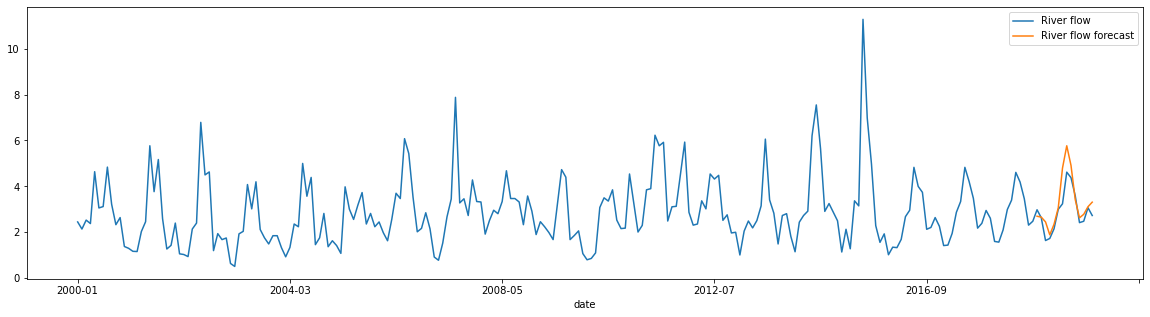


 ################ Basin 2 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00033: early stopping
Epoch 00022: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0577 - rmse: 0.2402 - val_loss: 0.0522 - val_rmse: 0.2284
Epoch 2/100
16/16 - 0s - loss: 0.0362 - rmse: 0.1903 - val_loss: 0.0369 - val_rmse: 0.1920
Epoch 3/100
16/16 - 0s - loss: 0.0349 - rmse: 0.1868 - val_loss: 0.0329 - val_rmse: 0.1814
Epoch 4/100
16/16 - 0s - loss: 0.0317 - rmse: 0.1779 - val_loss: 0.0294 - val_rmse: 0.1714
Epoch 5/100
16/16 - 0s - loss: 0.0298 - rmse: 0.1727 - val_loss: 0.0261 - val_rmse: 0.1615
Epoch 6/100
16/16 - 0s - loss: 0.0278 - rmse: 0.1666 - val_loss: 0.0237 - val_rmse: 0.1541
Epoch 7/100
16/16 - 0s - loss: 0.0265 - rmse: 0.1629 - val_loss: 0.0215 - val_rmse: 0.1467
Epoch 8/100
16/16 - 0s - loss: 0.0255 - rmse: 0.1596 - val_loss: 0.0205 - val_rmse: 0.1431
Epoch 9

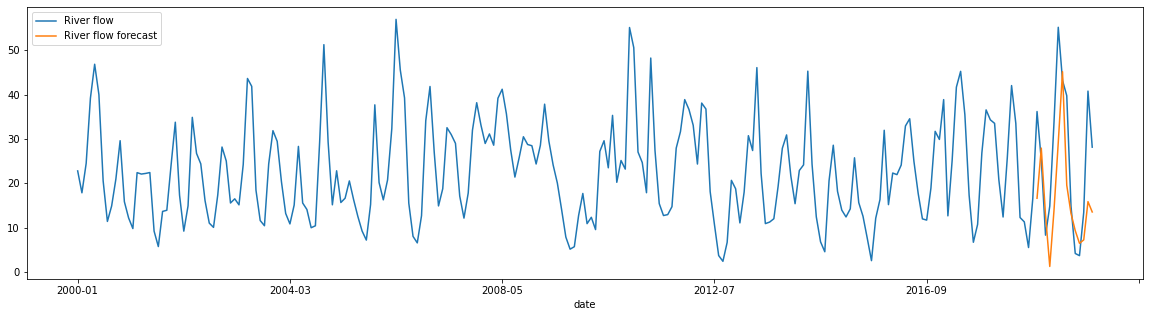


 ################ Basin 3 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00052: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0776 - rmse: 0.2785 - val_loss: 0.0776 - val_rmse: 0.2785
Epoch 2/100
16/16 - 0s - loss: 0.0367 - rmse: 0.1916 - val_loss: 0.0686 - val_rmse: 0.2619
Epoch 3/100
16/16 - 0s - loss: 0.0341 - rmse: 0.1848 - val_loss: 0.0701 - val_rmse: 0.2647
Epoch 4/100
16/16 - 0s - loss: 0.0296 - rmse: 0.1721 - val_loss: 0.0645 - val_rmse: 0.2541
Epoch 5/100
16/16 - 0s - loss: 0.0268 - rmse: 0.1636 - val_loss: 0.0646 - val_rmse: 0.2542
Epoch 6/100
16/16 - 1s - loss: 0.0248 - rmse: 0.1575 - val_loss: 0.0618 - val_rmse: 0.2486
Epoch 7/100
16/16 - 0s - loss: 0.0232 - rmse: 0.1524 - val_loss: 0.0595 - val_rmse: 0.2440
Epoch 8/100
16/16 - 0s - loss: 0.0220 - rmse: 0.1483 - val_loss: 0.0569 - val_rmse: 0.2385
Epoch 9

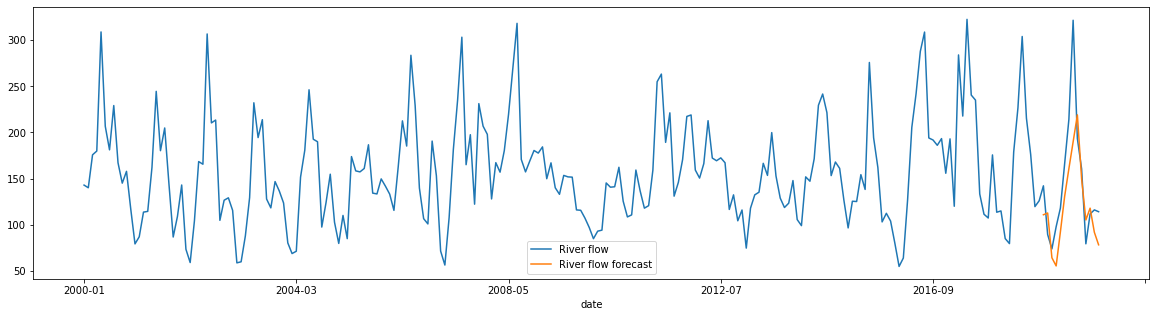


 ################ Basin 4 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00039: early stopping
Epoch 00023: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0472 - rmse: 0.2172 - val_loss: 0.0474 - val_rmse: 0.2178
Epoch 2/100
16/16 - 0s - loss: 0.0272 - rmse: 0.1650 - val_loss: 0.0199 - val_rmse: 0.1412
Epoch 3/100
16/16 - 0s - loss: 0.0267 - rmse: 0.1633 - val_loss: 0.0155 - val_rmse: 0.1246
Epoch 4/100
16/16 - 0s - loss: 0.0244 - rmse: 0.1561 - val_loss: 0.0141 - val_rmse: 0.1189
Epoch 5/100
16/16 - 0s - loss: 0.0235 - rmse: 0.1534 - val_loss: 0.0121 - val_rmse: 0.1098
Epoch 6/100
16/16 - 0s - loss: 0.0226 - rmse: 0.1503 - val_loss: 0.0111 - val_rmse: 0.1055
Epoch 7/100
16/16 - 0s - loss: 0.0220 - rmse: 0.1485 - val_loss: 0.0105 - val_rmse: 0.1023
Epoch 8/100
16/16 - 0s - loss: 0.0215 - rmse: 0.1466 - val_loss: 0.0099 - val_rmse: 0.0995
Epoch 9

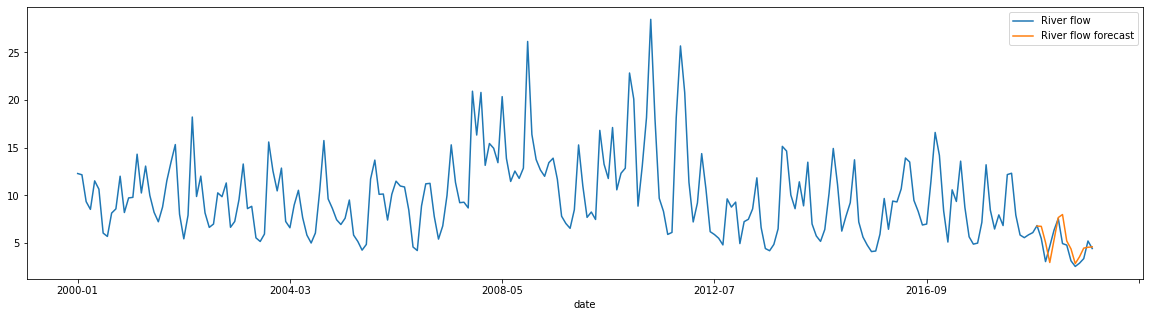


 ################ Basin 5 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00055: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00047: early stopping
Epoch 00021: early stopping
Epoch 00029: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0739 - rmse: 0.2718 - val_loss: 0.0235 - val_rmse: 0.1532
Epoch 2/100
8/8 - 0s - loss: 0.0360 - rmse: 0.1898 - val_loss: 0.0383 - val_rmse: 0.1957
Epoch 3/100
8/8 - 0s - loss: 0.0361 - rmse: 0.1901 - val_loss: 0.0313 - val_rmse: 0.1770
Epoch 4/100
8/8 - 0s - loss: 0.0316 - rmse: 0.1777 - val_loss: 0.0205 - val_rmse: 0.1433
Epoch 5/100
8/8 - 0s - loss: 0.0316 - rmse: 0.1778 - val_loss: 0.0197 - val_rmse: 0.1402
Epoch 6/100
8/8 - 0s - loss: 0.0304 - rmse: 0.1742 - val_loss: 0.0192 - val_rmse: 0.1387
Epoch 7/100
8/8 - 0s - loss: 0.0288 - rmse: 0.1697 - val_loss: 0.0193 - val_rmse: 0.1391
Epoch 8/100
8/8 - 0s - loss: 0.0279 - rmse: 0.1670 - val_loss: 0.0185 - val_rmse: 0.1360
Epoch 9/100
8/8 - 0s - 

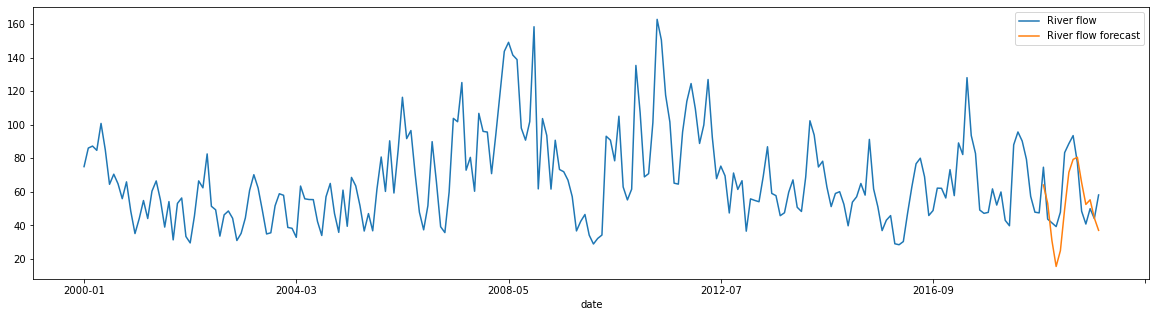


 ################ Basin 6 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00100: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0737 - rmse: 0.2715 - val_loss: 0.0148 - val_rmse: 0.1218
Epoch 2/100
16/16 - 0s - loss: 0.0452 - rmse: 0.2127 - val_loss: 0.0147 - val_rmse: 0.1213
Epoch 3/100
16/16 - 0s - loss: 0.0380 - rmse: 0.1950 - val_loss: 0.0203 - val_rmse: 0.1426
Epoch 4/100
16/16 - 0s - loss: 0.0346 - rmse: 0.1860 - val_loss: 0.0183 - val_rmse: 0.1353
Epoch 5/100
16/16 - 0s - loss: 0.0313 - rmse: 0.1768 - val_loss: 0.0199 - val_rmse: 0.1412
Epoch 6/100
16/16 - 0s - loss: 0.0289 - rmse: 0.1700 - val_loss: 0.0200 - val_rmse: 0.1415
Epoch 7/100
16/16 - 0s - loss: 0.0269 - rmse: 0.1640 - val_loss: 0.0194 - val_rmse: 0.1392
Epoch 8/100
16/16 - 0s - loss: 0.0251 - rmse: 0.1585 - val_loss: 0.0187 - val_rmse: 0.1367
Epoch 9

Epoch 88/100
16/16 - 0s - loss: 0.0065 - rmse: 0.0805 - val_loss: 0.0106 - val_rmse: 0.1031
Epoch 89/100
16/16 - 0s - loss: 0.0064 - rmse: 0.0803 - val_loss: 0.0106 - val_rmse: 0.1030
Epoch 90/100
16/16 - 0s - loss: 0.0064 - rmse: 0.0801 - val_loss: 0.0106 - val_rmse: 0.1030
Epoch 91/100
16/16 - 0s - loss: 0.0064 - rmse: 0.0798 - val_loss: 0.0106 - val_rmse: 0.1030
Epoch 92/100
16/16 - 0s - loss: 0.0063 - rmse: 0.0796 - val_loss: 0.0106 - val_rmse: 0.1030
Epoch 93/100
16/16 - 0s - loss: 0.0063 - rmse: 0.0794 - val_loss: 0.0106 - val_rmse: 0.1029
Epoch 94/100
16/16 - 0s - loss: 0.0063 - rmse: 0.0792 - val_loss: 0.0106 - val_rmse: 0.1029
Epoch 95/100
16/16 - 0s - loss: 0.0062 - rmse: 0.0790 - val_loss: 0.0106 - val_rmse: 0.1029
Epoch 96/100
16/16 - 0s - loss: 0.0062 - rmse: 0.0788 - val_loss: 0.0106 - val_rmse: 0.1029
Epoch 97/100
16/16 - 0s - loss: 0.0062 - rmse: 0.0786 - val_loss: 0.0106 - val_rmse: 0.1029
Epoch 98/100
16/16 - 0s - loss: 0.0061 - rmse: 0.0784 - val_loss: 0.0106 - val_r

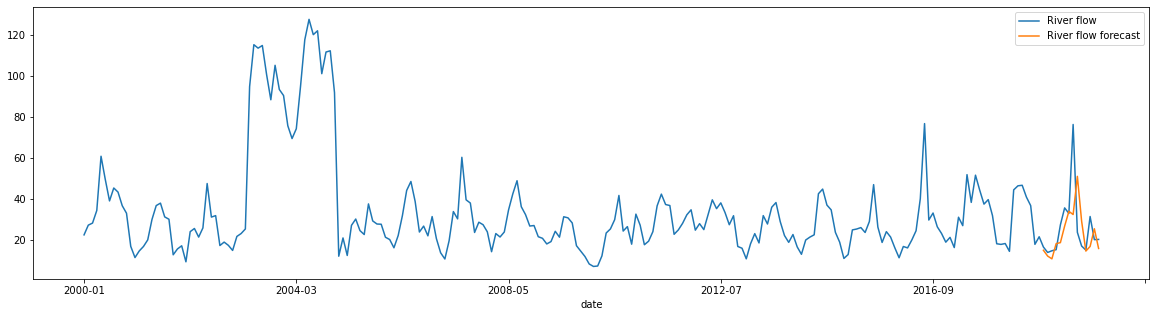


 ################ Basin 7 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00031: early stopping
Epoch 00023: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0867 - rmse: 0.2944 - val_loss: 0.0330 - val_rmse: 0.1816
Epoch 2/100
16/16 - 0s - loss: 0.0313 - rmse: 0.1770 - val_loss: 0.0239 - val_rmse: 0.1547
Epoch 3/100
16/16 - 0s - loss: 0.0282 - rmse: 0.1679 - val_loss: 0.0236 - val_rmse: 0.1536
Epoch 4/100
16/16 - 0s - loss: 0.0248 - rmse: 0.1575 - val_loss: 0.0206 - val_rmse: 0.1434
Epoch 5/100
16/16 - 0s - loss: 0.0226 - rmse: 0.1504 - val_loss: 0.0213 - val_rmse: 0.1460
Epoch 6/100
16/16 - 0s - loss: 0.0216 - rmse: 0.1469 - val_loss: 0.0211 - val_rmse: 0.1454
Epoch 7/100
16/16 - 0s - loss: 0.0202 - rmse: 0.1422 - val_loss: 0.0201 - val_rmse: 0.1417
Epoch 8/100
16/16 - 0s - loss: 0.0193 - rmse: 0.1388 - val_loss: 0.0191 - val_rmse: 0.1381
Epoch 9

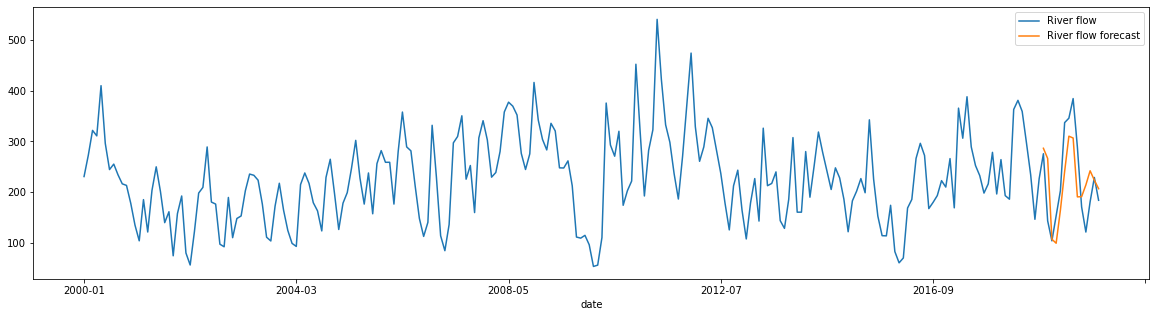


 ################ Basin 8 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00040: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.1126 - rmse: 0.3356 - val_loss: 0.0466 - val_rmse: 0.2159
Epoch 2/100
16/16 - 0s - loss: 0.0399 - rmse: 0.1997 - val_loss: 0.0386 - val_rmse: 0.1966
Epoch 3/100
16/16 - 0s - loss: 0.0349 - rmse: 0.1868 - val_loss: 0.0459 - val_rmse: 0.2142
Epoch 4/100
16/16 - 0s - loss: 0.0303 - rmse: 0.1740 - val_loss: 0.0411 - val_rmse: 0.2027
Epoch 5/100
16/16 - 0s - loss: 0.0269 - rmse: 0.1639 - val_loss: 0.0448 - val_rmse: 0.2116
Epoch 6/100
16/16 - 0s - loss: 0.0249 - rmse: 0.1578 - val_loss: 0.0433 - val_rmse: 0.2080
Epoch 7/100
16/16 - 0s - loss: 0.0229 - rmse: 0.1515 - val_loss: 0.0418 - val_rmse: 0.2046
Epoch 8/100
16/16 - 0s - loss: 0.0214 - rmse: 0.1462 - val_loss: 0.0392 - val_rmse: 0.1979
Epoch 9

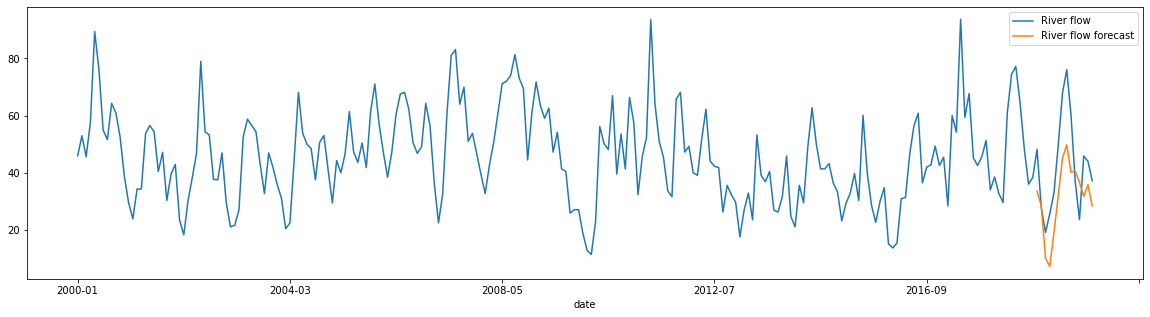


 ################ Basin 9 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00035: early stopping
Epoch 00022: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0628 - rmse: 0.2505 - val_loss: 0.0357 - val_rmse: 0.1889
Epoch 2/100
16/16 - 0s - loss: 0.0341 - rmse: 0.1847 - val_loss: 0.0237 - val_rmse: 0.1539
Epoch 3/100
16/16 - 0s - loss: 0.0244 - rmse: 0.1562 - val_loss: 0.0164 - val_rmse: 0.1281
Epoch 4/100
16/16 - 0s - loss: 0.0196 - rmse: 0.1398 - val_loss: 0.0138 - val_rmse: 0.1173
Epoch 5/100
16/16 - 0s - loss: 0.0180 - rmse: 0.1343 - val_loss: 0.0131 - val_rmse: 0.1146
Epoch 6/100
16/16 - 0s - loss: 0.0169 - rmse: 0.1301 - val_loss: 0.0124 - val_rmse: 0.1112
Epoch 7/100
16/16 - 0s - loss: 0.0164 - rmse: 0.1280 - val_loss: 0.0125 - val_rmse: 0.1119
Epoch 8/100
16/16 - 0s - loss: 0.0158 - rmse: 0.1257 - val_loss: 0.0118 - val_rmse: 0.1088
Epoch 9

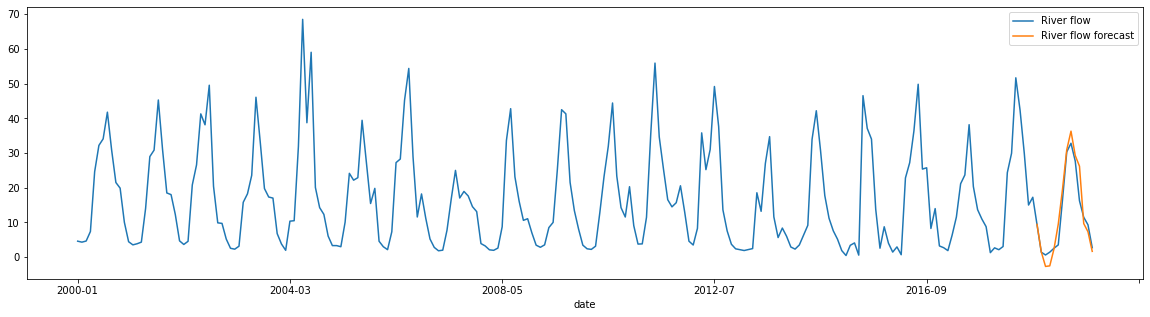


 ################ Basin 10 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00028: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00030: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0233 - rmse: 0.1527 - val_loss: 0.0146 - val_rmse: 0.1209
Epoch 2/100
16/16 - 0s - loss: 0.0179 - rmse: 0.1337 - val_loss: 0.0091 - val_rmse: 0.0954
Epoch 3/100
16/16 - 0s - loss: 0.0145 - rmse: 0.1203 - val_loss: 0.0088 - val_rmse: 0.0938
Epoch 4/100
16/16 - 0s - loss: 0.0138 - rmse: 0.1173 - val_loss: 0.0083 - val_rmse: 0.0913
Epoch 5/100
16/16 - 0s - loss: 0.0127 - rmse: 0.1128 - val_loss: 0.0082 - val_rmse: 0.0903
Epoch 6/100
16/16 - 0s - loss: 0.0124 - rmse: 0.1112 - val_loss: 0.0080 - val_rmse: 0.0894
Epoch 7/100
16/16 - 0s - loss: 0.0118 - rmse: 0.1088 - val_loss: 0.0081 - val_rmse: 0.0898
Epoch 8/100
16/16 - 0s - loss: 0.0116 - rmse: 0.1078 - val_loss: 0.0078 - val_rmse: 0.0882
Epoch 

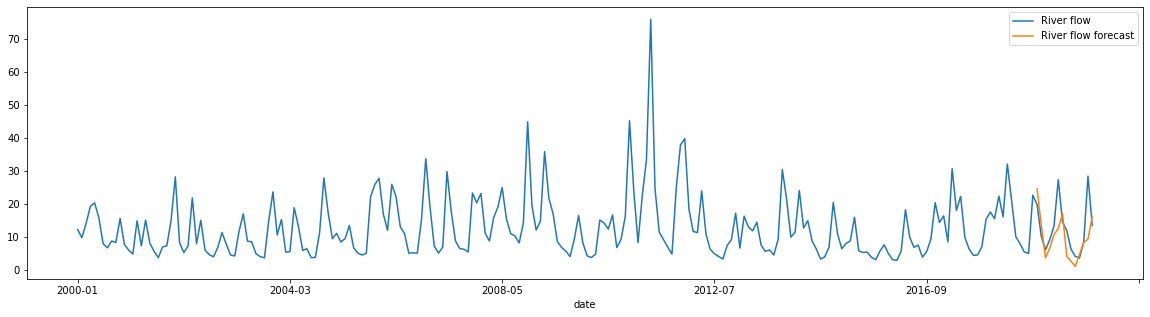


 ################ Basin 11 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00044: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0427 - rmse: 0.2065 - val_loss: 0.0315 - val_rmse: 0.1774
Epoch 2/100
16/16 - 0s - loss: 0.0371 - rmse: 0.1925 - val_loss: 0.0303 - val_rmse: 0.1740
Epoch 3/100
16/16 - 0s - loss: 0.0308 - rmse: 0.1756 - val_loss: 0.0283 - val_rmse: 0.1682
Epoch 4/100
16/16 - 0s - loss: 0.0289 - rmse: 0.1700 - val_loss: 0.0277 - val_rmse: 0.1663
Epoch 5/100
16/16 - 0s - loss: 0.0275 - rmse: 0.1658 - val_loss: 0.0265 - val_rmse: 0.1629
Epoch 6/100
16/16 - 0s - loss: 0.0265 - rmse: 0.1628 - val_loss: 0.0261 - val_rmse: 0.1616
Epoch 7/100
16/16 - 0s - loss: 0.0258 - rmse: 0.1606 - val_loss: 0.0256 - val_rmse: 0.1601
Epoch 8/100
16/16 - 0s - loss: 0.0253 - rmse: 0.1589 - val_loss: 0.0253 - val_rmse: 0.1591
Epoch 

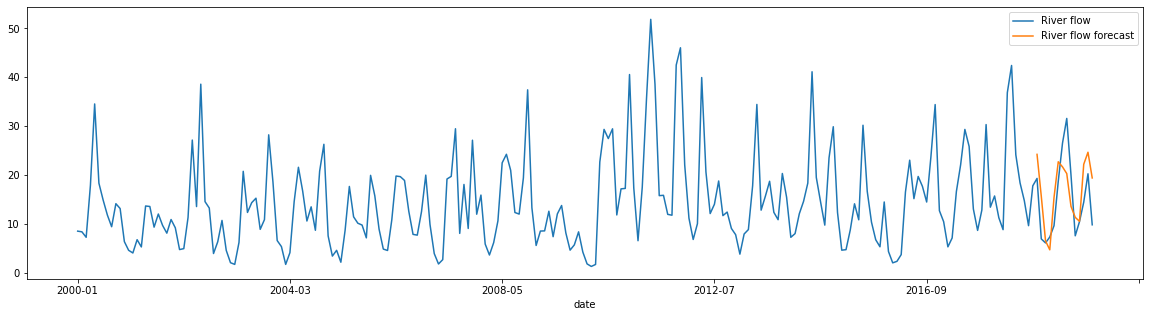


 ################ Basin 12 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00053: early stopping
Epoch 00022: early stopping
Epoch 00028: early stopping
Epoch 00022: early stopping
Epoch 00030: early stopping
Epoch 00022: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0891 - rmse: 0.2985 - val_loss: 0.0545 - val_rmse: 0.2335
Epoch 2/100
16/16 - 0s - loss: 0.0222 - rmse: 0.1489 - val_loss: 0.0542 - val_rmse: 0.2328
Epoch 3/100
16/16 - 0s - loss: 0.0135 - rmse: 0.1163 - val_loss: 0.0579 - val_rmse: 0.2405
Epoch 4/100
16/16 - 0s - loss: 0.0148 - rmse: 0.1218 - val_loss: 0.0559 - val_rmse: 0.2365
Epoch 5/100
16/16 - 0s - loss: 0.0125 - rmse: 0.1119 - val_loss: 0.0546 - val_rmse: 0.2337
Epoch 6/100
16/16 - 0s - loss: 0.0118 - rmse: 0.1085 - val_loss: 0.0561 - val_rmse: 0.2369
Epoch 7/100
16/16 - 0s - loss: 0.0113 - rmse: 0.1064 - val_loss: 0.0555 - val_rmse: 0.2356
Epoch 8/100
16/16 - 0s - loss: 0.0108 - rmse: 0.1040 - val_loss: 0.0549 - val_rmse: 0.2342
Epoch 

Epoch 88/100
16/16 - 0s - loss: 0.0044 - rmse: 0.0661 - val_loss: 0.0304 - val_rmse: 0.1743
Epoch 89/100
16/16 - 0s - loss: 0.0044 - rmse: 0.0660 - val_loss: 0.0304 - val_rmse: 0.1742
Epoch 90/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0659 - val_loss: 0.0303 - val_rmse: 0.1742
Epoch 91/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0658 - val_loss: 0.0303 - val_rmse: 0.1741
Epoch 92/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0658 - val_loss: 0.0303 - val_rmse: 0.1741
Epoch 93/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0657 - val_loss: 0.0303 - val_rmse: 0.1741
Epoch 94/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0656 - val_loss: 0.0303 - val_rmse: 0.1740
Epoch 95/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0655 - val_loss: 0.0303 - val_rmse: 0.1740
Epoch 96/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0654 - val_loss: 0.0303 - val_rmse: 0.1740
Epoch 97/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0653 - val_loss: 0.0303 - val_rmse: 0.1739
Epoch 98/100
16/16 - 0s - loss: 0.0043 - rmse: 0.0653 - val_loss: 0.0302 - val_r

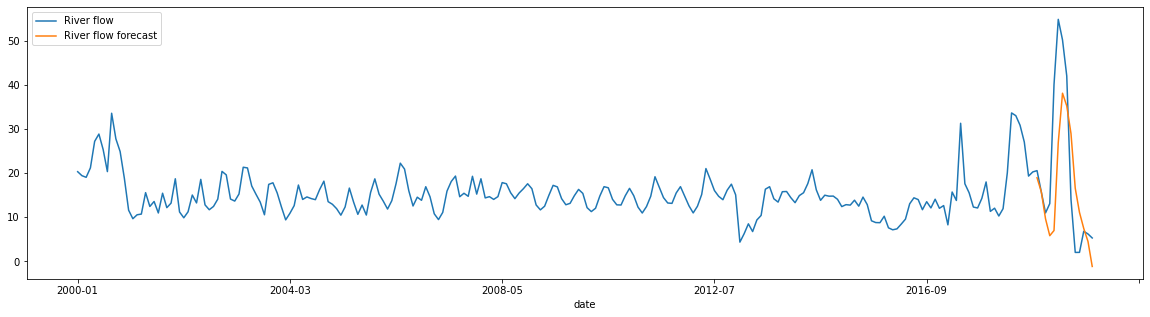


 ################ Basin 13 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00030: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00031: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0578 - rmse: 0.2404 - val_loss: 0.0603 - val_rmse: 0.2455
Epoch 2/100
16/16 - 0s - loss: 0.0279 - rmse: 0.1669 - val_loss: 0.0325 - val_rmse: 0.1803
Epoch 3/100
16/16 - 0s - loss: 0.0278 - rmse: 0.1667 - val_loss: 0.0269 - val_rmse: 0.1639
Epoch 4/100
16/16 - 0s - loss: 0.0223 - rmse: 0.1494 - val_loss: 0.0266 - val_rmse: 0.1632
Epoch 5/100
16/16 - 0s - loss: 0.0211 - rmse: 0.1452 - val_loss: 0.0237 - val_rmse: 0.1539
Epoch 6/100
16/16 - 0s - loss: 0.0191 - rmse: 0.1381 - val_loss: 0.0224 - val_rmse: 0.1495
Epoch 7/100
16/16 - 0s - loss: 0.0177 - rmse: 0.1332 - val_loss: 0.0213 - val_rmse: 0.1461
Epoch 8/100
16/16 - 0s - loss: 0.0165 - rmse: 0.1284 - val_loss: 0.0207 - val_rmse: 0.1438
Epoch 

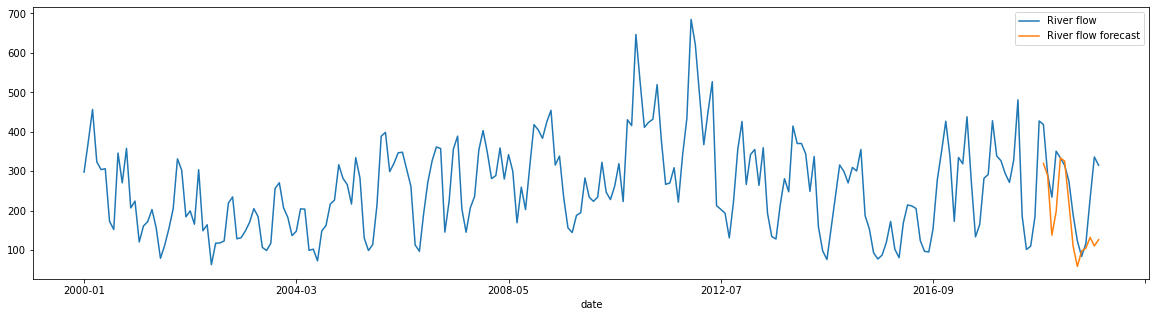


 ################ Basin 14 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00033: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.1024 - rmse: 0.3201 - val_loss: 0.0731 - val_rmse: 0.2704
Epoch 2/100
16/16 - 0s - loss: 0.0528 - rmse: 0.2298 - val_loss: 0.0432 - val_rmse: 0.2078
Epoch 3/100
16/16 - 0s - loss: 0.0487 - rmse: 0.2206 - val_loss: 0.0383 - val_rmse: 0.1957
Epoch 4/100
16/16 - 0s - loss: 0.0393 - rmse: 0.1983 - val_loss: 0.0344 - val_rmse: 0.1854
Epoch 5/100
16/16 - 0s - loss: 0.0348 - rmse: 0.1865 - val_loss: 0.0315 - val_rmse: 0.1776
Epoch 6/100
16/16 - 0s - loss: 0.0312 - rmse: 0.1767 - val_loss: 0.0293 - val_rmse: 0.1713
Epoch 7/100
16/16 - 0s - loss: 0.0294 - rmse: 0.1713 - val_loss: 0.0280 - val_rmse: 0.1675
Epoch 8/100
16/16 - 0s - loss: 0.0282 - rmse: 0.1680 - val_loss: 0.0272 - val_rmse: 0.1649
Epoch 

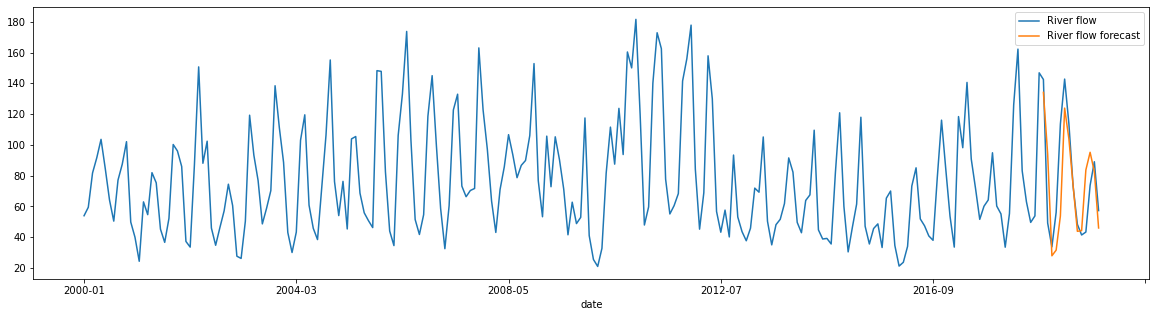


 ################ Basin 15 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00029: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0545 - rmse: 0.2334 - val_loss: 0.0236 - val_rmse: 0.1535
Epoch 2/100
16/16 - 0s - loss: 0.0269 - rmse: 0.1640 - val_loss: 0.0125 - val_rmse: 0.1120
Epoch 3/100
16/16 - 1s - loss: 0.0270 - rmse: 0.1642 - val_loss: 0.0109 - val_rmse: 0.1043
Epoch 4/100
16/16 - 0s - loss: 0.0234 - rmse: 0.1529 - val_loss: 0.0104 - val_rmse: 0.1021
Epoch 5/100
16/16 - 0s - loss: 0.0224 - rmse: 0.1497 - val_loss: 0.0095 - val_rmse: 0.0972
Epoch 6/100
16/16 - 0s - loss: 0.0205 - rmse: 0.1433 - val_loss: 0.0093 - val_rmse: 0.0966
Epoch 7/100
16/16 - 0s - loss: 0.0198 - rmse: 0.1407 - val_loss: 0.0085 - val_rmse: 0.0922
Epoch 8/100
16/16 - 0s - loss: 0.0188 - rmse: 0.1371 - val_loss: 0.0086 - val_rmse: 0.0928
Epoch 

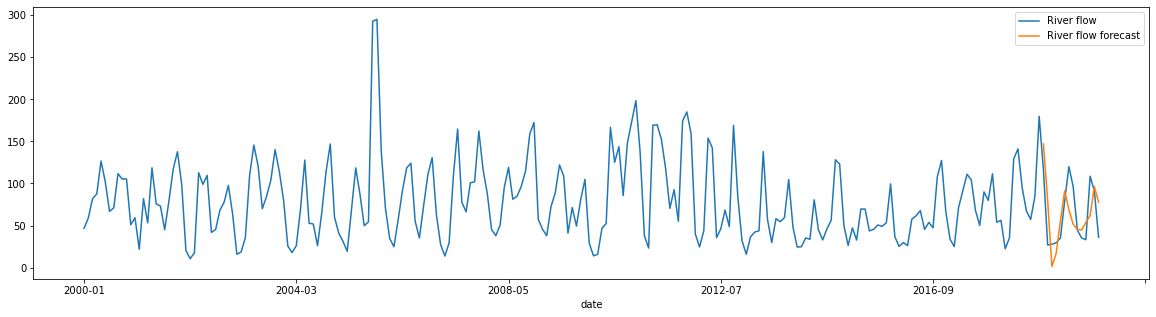


 ################ Basin 16 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00044: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0596 - rmse: 0.2441 - val_loss: 0.0188 - val_rmse: 0.1372
Epoch 2/100
16/16 - 0s - loss: 0.0365 - rmse: 0.1910 - val_loss: 0.0160 - val_rmse: 0.1265
Epoch 3/100
16/16 - 0s - loss: 0.0350 - rmse: 0.1870 - val_loss: 0.0146 - val_rmse: 0.1207
Epoch 4/100
16/16 - 0s - loss: 0.0304 - rmse: 0.1745 - val_loss: 0.0127 - val_rmse: 0.1126
Epoch 5/100
16/16 - 0s - loss: 0.0288 - rmse: 0.1697 - val_loss: 0.0126 - val_rmse: 0.1122
Epoch 6/100
16/16 - 0s - loss: 0.0263 - rmse: 0.1623 - val_loss: 0.0119 - val_rmse: 0.1089
Epoch 7/100
16/16 - 0s - loss: 0.0251 - rmse: 0.1584 - val_loss: 0.0112 - val_rmse: 0.1058
Epoch 8/100
16/16 - 0s - loss: 0.0237 - rmse: 0.1540 - val_loss: 0.0113 - val_rmse: 0.1061
Epoch 

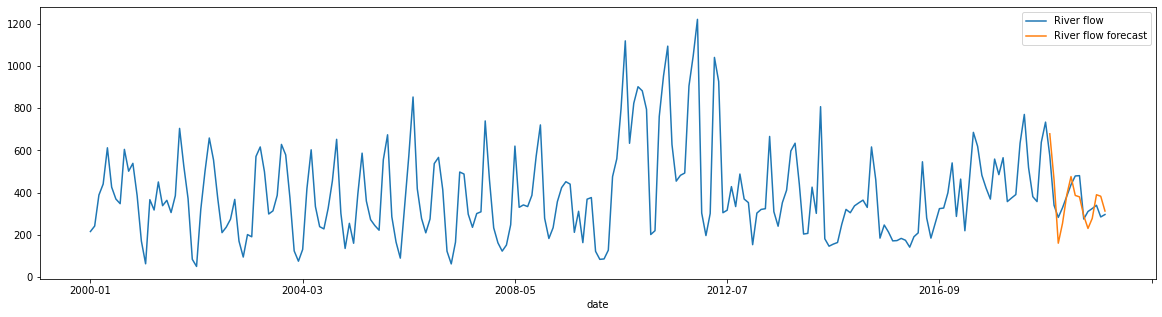


 ################ Basin 17 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00062: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0987 - rmse: 0.3142 - val_loss: 0.0217 - val_rmse: 0.1472
Epoch 2/100
8/8 - 0s - loss: 0.0398 - rmse: 0.1995 - val_loss: 0.0411 - val_rmse: 0.2028
Epoch 3/100
8/8 - 0s - loss: 0.0349 - rmse: 0.1868 - val_loss: 0.0371 - val_rmse: 0.1925
Epoch 4/100
8/8 - 0s - loss: 0.0271 - rmse: 0.1645 - val_loss: 0.0175 - val_rmse: 0.1323
Epoch 5/100
8/8 - 0s - loss: 0.0253 - rmse: 0.1591 - val_loss: 0.0148 - val_rmse: 0.1215
Epoch 6/100
8/8 - 0s - loss: 0.0251 - rmse: 0.1585 - val_loss: 0.0139 - val_rmse: 0.1181
Epoch 7/100
8/8 - 0s - loss: 0.0233 - rmse: 0.1525 - val_loss: 0.0129 - val_rmse: 0.1134
Epoch 8/100
8/8 - 0s - loss: 0.0218 - rmse: 0.1475 - val_loss: 0.0120 - val_rmse: 0.1096
Epoch 9/100
8/8 - 0s -

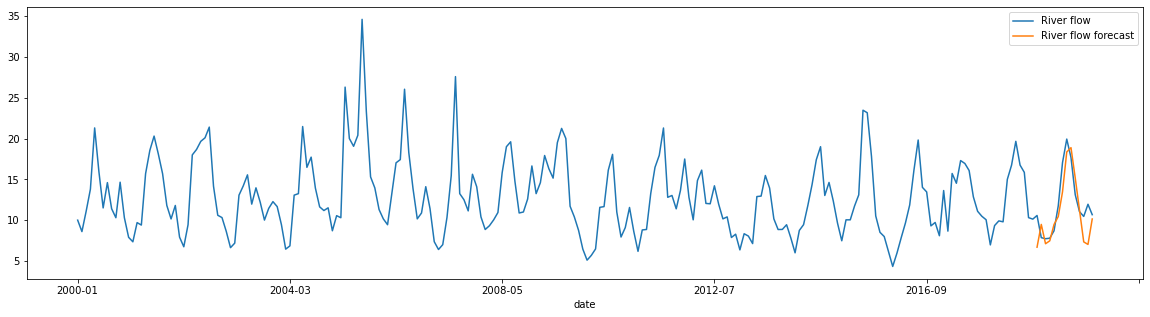


 ################ Basin 18 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00026: early stopping
Epoch 00025: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
60 batch size
Epoch 1/100
4/4 - 1s - loss: 0.1337 - rmse: 0.3656 - val_loss: 0.0124 - val_rmse: 0.1114
Epoch 2/100
4/4 - 0s - loss: 0.0738 - rmse: 0.2717 - val_loss: 0.0129 - val_rmse: 0.1134
Epoch 3/100
4/4 - 0s - loss: 0.0452 - rmse: 0.2125 - val_loss: 0.0305 - val_rmse: 0.1746
Epoch 4/100
4/4 - 0s - loss: 0.0354 - rmse: 0.1882 - val_loss: 0.0420 - val_rmse: 0.2050
Epoch 5/100
4/4 - 0s - loss: 0.0325 - rmse: 0.1802 - val_loss: 0.0403 - val_rmse: 0.2006
Epoch 6/100
4/4 - 0s - loss: 0.0307 - rmse: 0.1752 - val_loss: 0.0310 - val_rmse: 0.1761
Epoch 7/100
4/4 - 0s - loss: 0.0297 - rmse: 0.1723 - val_loss: 0.0214 - val_rmse: 0.1464
Epoch 8/100
4/4 - 0s - loss: 0.0298 - rmse: 0.1726 - val_loss: 0.0149 - val_rmse: 0.1221
Epoch 9/100
4/4 - 0s -

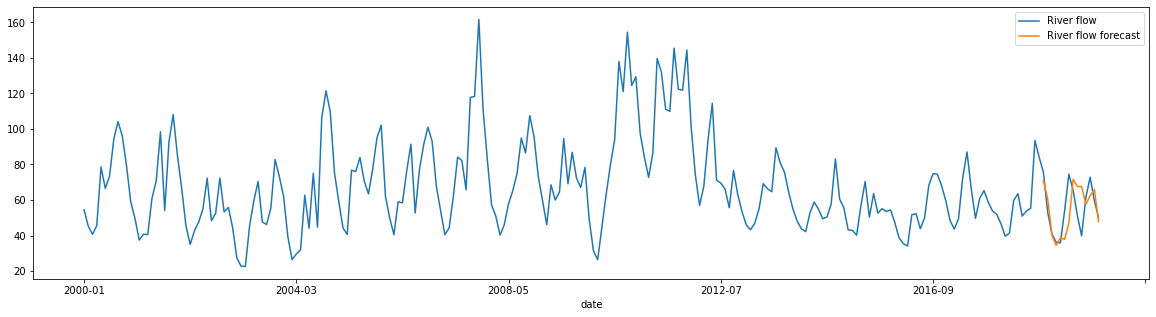


 ################ Basin 19 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00037: early stopping
Epoch 00021: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
36 batch size
Epoch 1/100
6/6 - 1s - loss: 0.1010 - rmse: 0.3178 - val_loss: 0.0382 - val_rmse: 0.1956
Epoch 2/100
6/6 - 0s - loss: 0.0471 - rmse: 0.2170 - val_loss: 0.0145 - val_rmse: 0.1203
Epoch 3/100
6/6 - 0s - loss: 0.0294 - rmse: 0.1715 - val_loss: 0.0220 - val_rmse: 0.1482
Epoch 4/100
6/6 - 0s - loss: 0.0265 - rmse: 0.1627 - val_loss: 0.0255 - val_rmse: 0.1596
Epoch 5/100
6/6 - 0s - loss: 0.0248 - rmse: 0.1575 - val_loss: 0.0201 - val_rmse: 0.1418
Epoch 6/100
6/6 - 0s - loss: 0.0230 - rmse: 0.1517 - val_loss: 0.0151 - val_rmse: 0.1230
Epoch 7/100
6/6 - 0s - loss: 0.0223 - rmse: 0.1495 - val_loss: 0.0138 - val_rmse: 0.1173
Epoch 8/100
6/6 - 0s - loss: 0.0221 - rmse: 0.1486 - val_loss: 0.0139 - val_rmse: 0.1178
Epoch 9/100
6/6 - 0s -

Epoch 90/100
6/6 - 0s - loss: 0.0097 - rmse: 0.0984 - val_loss: 0.0092 - val_rmse: 0.0962
Epoch 91/100
6/6 - 0s - loss: 0.0097 - rmse: 0.0983 - val_loss: 0.0092 - val_rmse: 0.0961
Epoch 92/100
6/6 - 0s - loss: 0.0096 - rmse: 0.0981 - val_loss: 0.0092 - val_rmse: 0.0961
Epoch 93/100
6/6 - 0s - loss: 0.0096 - rmse: 0.0980 - val_loss: 0.0092 - val_rmse: 0.0961
Epoch 94/100
6/6 - 0s - loss: 0.0096 - rmse: 0.0979 - val_loss: 0.0092 - val_rmse: 0.0961
Epoch 95/100
6/6 - 0s - loss: 0.0096 - rmse: 0.0978 - val_loss: 0.0092 - val_rmse: 0.0960
Epoch 96/100
6/6 - 0s - loss: 0.0095 - rmse: 0.0977 - val_loss: 0.0092 - val_rmse: 0.0960
Epoch 97/100
6/6 - 0s - loss: 0.0095 - rmse: 0.0975 - val_loss: 0.0092 - val_rmse: 0.0960
Epoch 98/100
6/6 - 0s - loss: 0.0095 - rmse: 0.0974 - val_loss: 0.0092 - val_rmse: 0.0960
Epoch 99/100
6/6 - 0s - loss: 0.0095 - rmse: 0.0973 - val_loss: 0.0092 - val_rmse: 0.0960
Epoch 100/100
6/6 - 0s - loss: 0.0094 - rmse: 0.0972 - val_loss: 0.0092 - val_rmse: 0.0960
Test RMSE

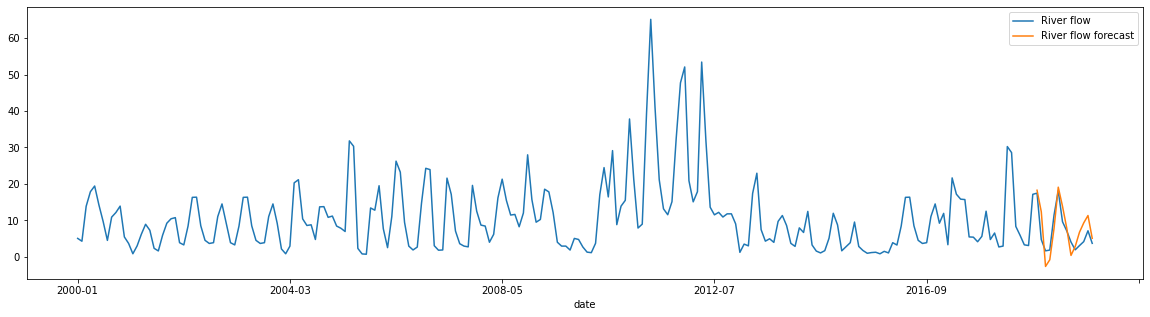


 ################ Basin 20 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00044: early stopping
Epoch 00051: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0317 - rmse: 0.1782 - val_loss: 0.0467 - val_rmse: 0.2160
Epoch 2/100
16/16 - 0s - loss: 0.0264 - rmse: 0.1623 - val_loss: 0.0460 - val_rmse: 0.2145
Epoch 3/100
16/16 - 0s - loss: 0.0189 - rmse: 0.1376 - val_loss: 0.0419 - val_rmse: 0.2047
Epoch 4/100
16/16 - 0s - loss: 0.0177 - rmse: 0.1330 - val_loss: 0.0438 - val_rmse: 0.2094
Epoch 5/100
16/16 - 0s - loss: 0.0159 - rmse: 0.1261 - val_loss: 0.0418 - val_rmse: 0.2044
Epoch 6/100
16/16 - 0s - loss: 0.0152 - rmse: 0.1234 - val_loss: 0.0404 - val_rmse: 0.2010
Epoch 7/100
16/16 - 0s - loss: 0.0143 - rmse: 0.1198 - val_loss: 0.0389 - val_rmse: 0.1972
Epoch 8/100
16/16 - 0s - loss: 0.0138 - rmse: 0.1175 - val_loss: 0.0365 - val_rmse: 0.1910
Epoch 

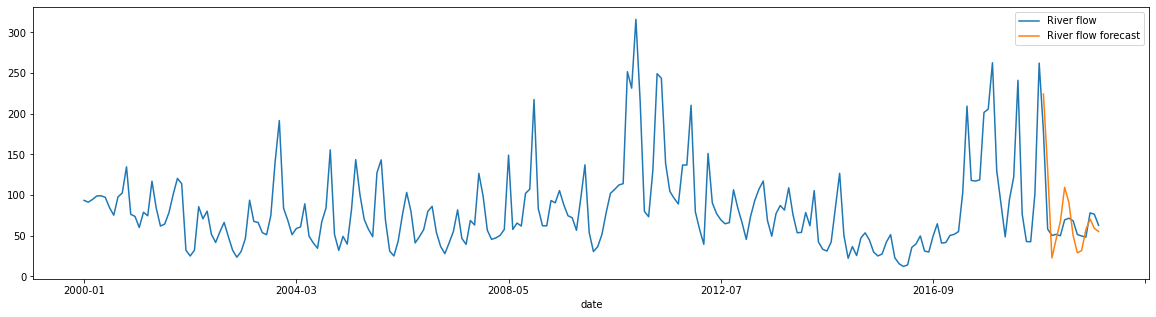


 ################ Basin 21 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00037: early stopping
Epoch 00025: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0456 - rmse: 0.2135 - val_loss: 0.0153 - val_rmse: 0.1235
Epoch 2/100
16/16 - 0s - loss: 0.0289 - rmse: 0.1700 - val_loss: 0.0110 - val_rmse: 0.1047
Epoch 3/100
16/16 - 0s - loss: 0.0274 - rmse: 0.1654 - val_loss: 0.0098 - val_rmse: 0.0989
Epoch 4/100
16/16 - 0s - loss: 0.0251 - rmse: 0.1586 - val_loss: 0.0093 - val_rmse: 0.0965
Epoch 5/100
16/16 - 0s - loss: 0.0240 - rmse: 0.1549 - val_loss: 0.0089 - val_rmse: 0.0941
Epoch 6/100
16/16 - 0s - loss: 0.0226 - rmse: 0.1504 - val_loss: 0.0085 - val_rmse: 0.0920
Epoch 7/100
16/16 - 0s - loss: 0.0218 - rmse: 0.1477 - val_loss: 0.0080 - val_rmse: 0.0897
Epoch 8/100
16/16 - 0s - loss: 0.0209 - rmse: 0.1447 - val_loss: 0.0079 - val_rmse: 0.0888
Epoch 

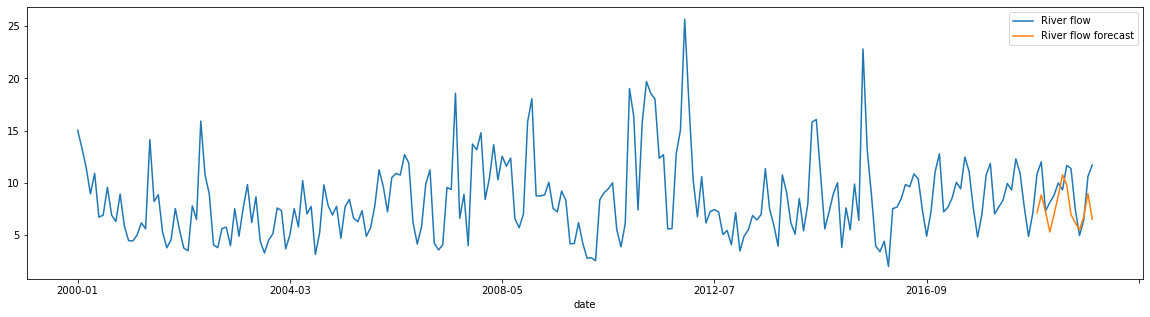


 ################ Basin 22 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00038: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0391 - rmse: 0.1978 - val_loss: 0.0197 - val_rmse: 0.1403
Epoch 2/100
8/8 - 0s - loss: 0.0298 - rmse: 0.1727 - val_loss: 0.0145 - val_rmse: 0.1204
Epoch 3/100
8/8 - 0s - loss: 0.0233 - rmse: 0.1527 - val_loss: 0.0122 - val_rmse: 0.1104
Epoch 4/100
8/8 - 0s - loss: 0.0209 - rmse: 0.1444 - val_loss: 0.0088 - val_rmse: 0.0936
Epoch 5/100
8/8 - 0s - loss: 0.0189 - rmse: 0.1375 - val_loss: 0.0077 - val_rmse: 0.0879
Epoch 6/100
8/8 - 0s - loss: 0.0178 - rmse: 0.1335 - val_loss: 0.0071 - val_rmse: 0.0845
Epoch 7/100
8/8 - 0s - loss: 0.0176 - rmse: 0.1325 - val_loss: 0.0067 - val_rmse: 0.0822
Epoch 8/100
8/8 - 0s - loss: 0.0171 - rmse: 0.1307 - val_loss: 0.0064 - val_rmse: 0.0803
Epoch 9/100
8/8 - 0s -

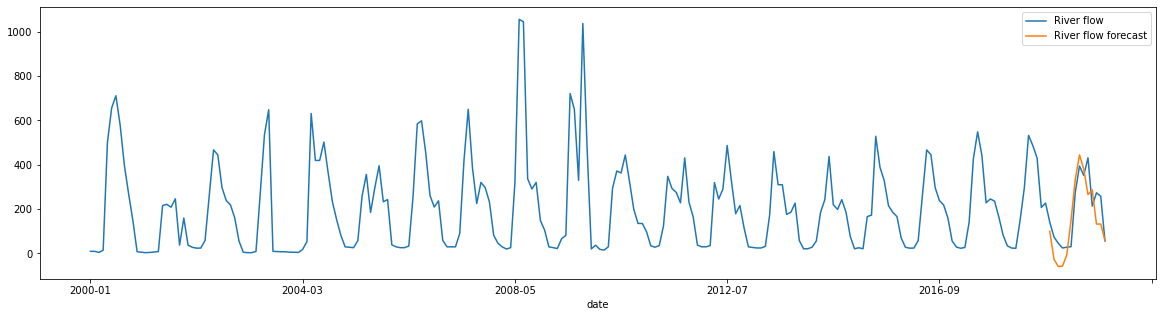


 ################ Basin 23 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00053: early stopping
Epoch 00022: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00029: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0957 - rmse: 0.3094 - val_loss: 0.0749 - val_rmse: 0.2736
Epoch 2/100
16/16 - 0s - loss: 0.0544 - rmse: 0.2333 - val_loss: 0.0563 - val_rmse: 0.2373
Epoch 3/100
16/16 - 0s - loss: 0.0462 - rmse: 0.2149 - val_loss: 0.0483 - val_rmse: 0.2197
Epoch 4/100
16/16 - 0s - loss: 0.0365 - rmse: 0.1910 - val_loss: 0.0405 - val_rmse: 0.2014
Epoch 5/100
16/16 - 0s - loss: 0.0302 - rmse: 0.1738 - val_loss: 0.0347 - val_rmse: 0.1863
Epoch 6/100
16/16 - 0s - loss: 0.0258 - rmse: 0.1607 - val_loss: 0.0306 - val_rmse: 0.1748
Epoch 7/100
16/16 - 0s - loss: 0.0233 - rmse: 0.1526 - val_loss: 0.0279 - val_rmse: 0.1671
Epoch 8/100
16/16 - 0s - loss: 0.0218 - rmse: 0.1475 - val_loss: 0.0267 - val_rmse: 0.1634
Epoch 

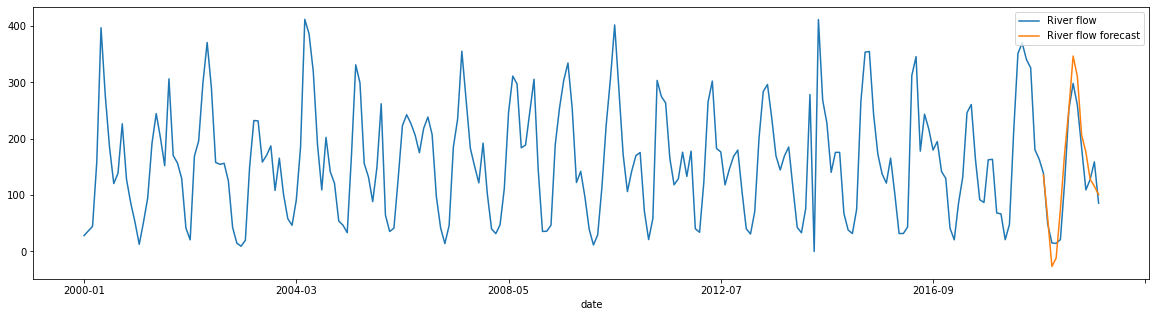


 ################ Basin 24 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00023: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0374 - rmse: 0.1933 - val_loss: 0.0320 - val_rmse: 0.1789
Epoch 2/100
16/16 - 0s - loss: 0.0221 - rmse: 0.1486 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 3/100
16/16 - 0s - loss: 0.0204 - rmse: 0.1427 - val_loss: 0.0154 - val_rmse: 0.1240
Epoch 4/100
16/16 - 0s - loss: 0.0177 - rmse: 0.1329 - val_loss: 0.0160 - val_rmse: 0.1266
Epoch 5/100
16/16 - 0s - loss: 0.0163 - rmse: 0.1275 - val_loss: 0.0178 - val_rmse: 0.1334
Epoch 6/100
16/16 - 0s - loss: 0.0150 - rmse: 0.1226 - val_loss: 0.0180 - val_rmse: 0.1343
Epoch 7/100
16/16 - 0s - loss: 0.0141 - rmse: 0.1189 - val_loss: 0.0179 - val_rmse: 0.1337
Epoch 8/100
16/16 - 0s - loss: 0.0134 - rmse: 0.1159 - val_loss: 0.0178 - val_rmse: 0.1333
Epoch 

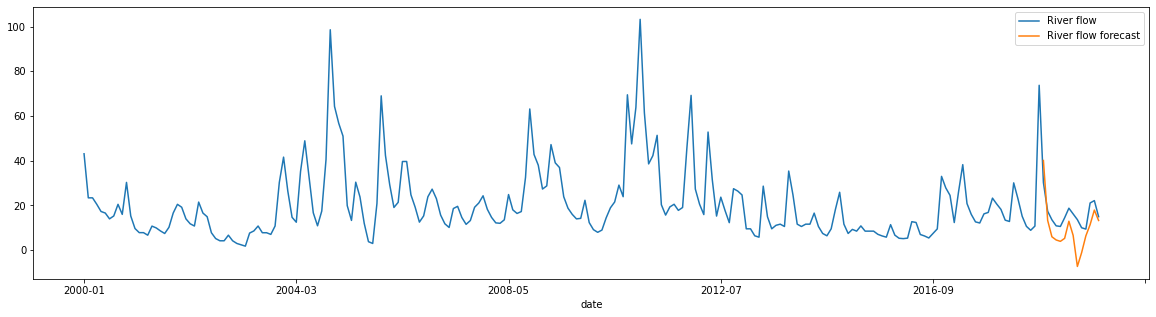


 ################ Basin 25 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00026: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0356 - rmse: 0.1887 - val_loss: 0.0487 - val_rmse: 0.2206
Epoch 2/100
16/16 - 0s - loss: 0.0226 - rmse: 0.1502 - val_loss: 0.0117 - val_rmse: 0.1082
Epoch 3/100
16/16 - 0s - loss: 0.0209 - rmse: 0.1445 - val_loss: 0.0084 - val_rmse: 0.0918
Epoch 4/100
16/16 - 0s - loss: 0.0180 - rmse: 0.1343 - val_loss: 0.0068 - val_rmse: 0.0825
Epoch 5/100
16/16 - 0s - loss: 0.0169 - rmse: 0.1302 - val_loss: 0.0063 - val_rmse: 0.0795
Epoch 6/100
16/16 - 0s - loss: 0.0160 - rmse: 0.1265 - val_loss: 0.0062 - val_rmse: 0.0788
Epoch 7/100
16/16 - 0s - loss: 0.0152 - rmse: 0.1234 - val_loss: 0.0062 - val_rmse: 0.0789
Epoch 8/100
16/16 - 0s - loss: 0.0146 - rmse: 0.1208 - val_loss: 0.0062 - val_rmse: 0.0787
Epoch 

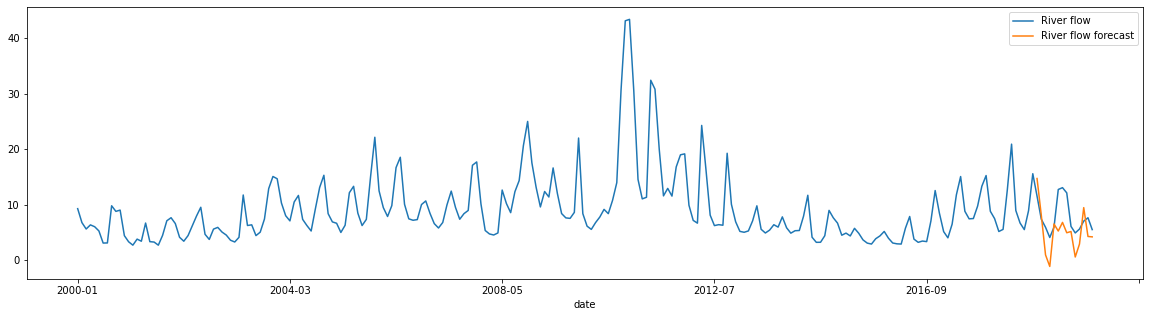


 ################ Basin 26 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00041: early stopping
Epoch 00021: early stopping
Epoch 00032: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
36 batch size
Epoch 1/100
6/6 - 1s - loss: 0.0061 - rmse: 0.0783 - val_loss: 0.0322 - val_rmse: 0.1794
Epoch 2/100
6/6 - 0s - loss: 0.0039 - rmse: 0.0625 - val_loss: 0.0304 - val_rmse: 0.1743
Epoch 3/100
6/6 - 0s - loss: 0.0038 - rmse: 0.0614 - val_loss: 0.0309 - val_rmse: 0.1759
Epoch 4/100
6/6 - 0s - loss: 0.0034 - rmse: 0.0587 - val_loss: 0.0299 - val_rmse: 0.1729
Epoch 5/100
6/6 - 0s - loss: 0.0031 - rmse: 0.0557 - val_loss: 0.0292 - val_rmse: 0.1710
Epoch 6/100
6/6 - 0s - loss: 0.0030 - rmse: 0.0546 - val_loss: 0.0294 - val_rmse: 0.1713
Epoch 7/100
6/6 - 0s - loss: 0.0029 - rmse: 0.0537 - val_loss: 0.0292 - val_rmse: 0.1710
Epoch 8/100
6/6 - 1s - loss: 0.0028 - rmse: 0.0525 - val_loss: 0.0287 - val_rmse: 0.1693
Epoch 9/100
6/6 - 0s -

Epoch 90/100
6/6 - 0s - loss: 0.0015 - rmse: 0.0383 - val_loss: 0.0271 - val_rmse: 0.1646
Epoch 91/100
6/6 - 0s - loss: 0.0015 - rmse: 0.0382 - val_loss: 0.0271 - val_rmse: 0.1646
Epoch 92/100
6/6 - 0s - loss: 0.0015 - rmse: 0.0382 - val_loss: 0.0271 - val_rmse: 0.1647
Epoch 93/100
6/6 - 0s - loss: 0.0014 - rmse: 0.0381 - val_loss: 0.0272 - val_rmse: 0.1648
Epoch 94/100
6/6 - 0s - loss: 0.0014 - rmse: 0.0380 - val_loss: 0.0272 - val_rmse: 0.1649
Epoch 95/100
6/6 - 0s - loss: 0.0014 - rmse: 0.0379 - val_loss: 0.0272 - val_rmse: 0.1649
Epoch 96/100
6/6 - 0s - loss: 0.0014 - rmse: 0.0378 - val_loss: 0.0272 - val_rmse: 0.1651
Epoch 00096: early stopping
Test RMSE: 114.387
Mean Absolute Percentage Error: 333.4293663806776
Symmetric Mean Absolute Percentage Error: 56.128821699943124


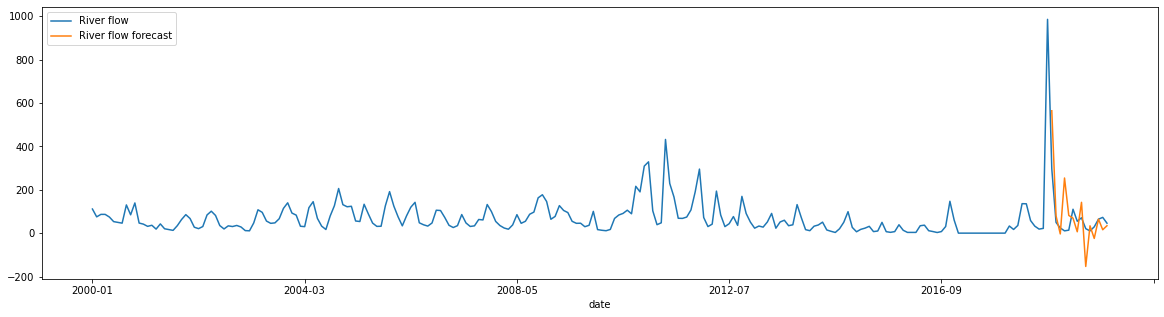


 ################ Basin 27 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00024: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0329 - rmse: 0.1814 - val_loss: 0.0162 - val_rmse: 0.1275
Epoch 2/100
16/16 - 0s - loss: 0.0277 - rmse: 0.1665 - val_loss: 0.0103 - val_rmse: 0.1017
Epoch 3/100
16/16 - 0s - loss: 0.0213 - rmse: 0.1460 - val_loss: 0.0109 - val_rmse: 0.1046
Epoch 4/100
16/16 - 0s - loss: 0.0190 - rmse: 0.1378 - val_loss: 0.0103 - val_rmse: 0.1016
Epoch 5/100
16/16 - 0s - loss: 0.0179 - rmse: 0.1339 - val_loss: 0.0102 - val_rmse: 0.1010
Epoch 6/100
16/16 - 0s - loss: 0.0169 - rmse: 0.1300 - val_loss: 0.0104 - val_rmse: 0.1022
Epoch 7/100
16/16 - 0s - loss: 0.0161 - rmse: 0.1269 - val_loss: 0.0104 - val_rmse: 0.1022
Epoch 8/100
16/16 - 0s - loss: 0.0154 - rmse: 0.1241 - val_loss: 0.0105 - val_rmse: 0.1024
Epoch 

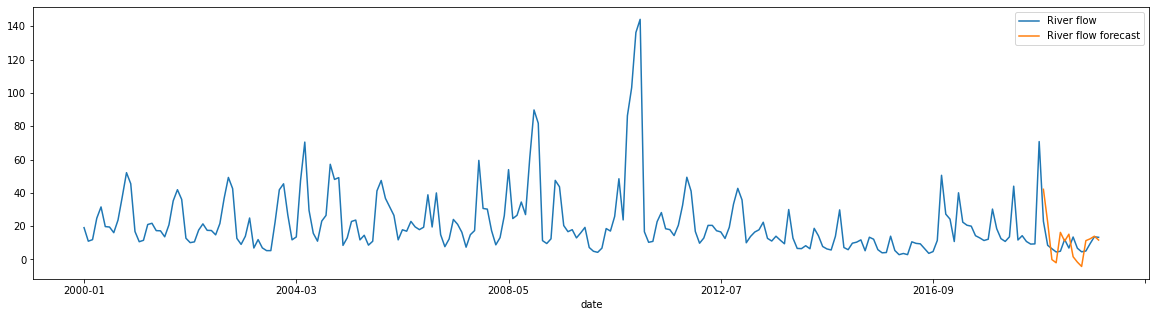


 ################ Basin 28 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00043: early stopping
Epoch 00068: early stopping
Epoch 00021: early stopping
Epoch 00057: early stopping
Epoch 00023: early stopping
Epoch 00051: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0782 - rmse: 0.2796 - val_loss: 0.0500 - val_rmse: 0.2237
Epoch 2/100
8/8 - 0s - loss: 0.0587 - rmse: 0.2424 - val_loss: 0.0524 - val_rmse: 0.2289
Epoch 3/100
8/8 - 0s - loss: 0.0469 - rmse: 0.2167 - val_loss: 0.0398 - val_rmse: 0.1995
Epoch 4/100
8/8 - 0s - loss: 0.0437 - rmse: 0.2091 - val_loss: 0.0380 - val_rmse: 0.1950
Epoch 5/100
8/8 - 0s - loss: 0.0405 - rmse: 0.2014 - val_loss: 0.0337 - val_rmse: 0.1835
Epoch 6/100
8/8 - 0s - loss: 0.0364 - rmse: 0.1907 - val_loss: 0.0308 - val_rmse: 0.1755
Epoch 7/100
8/8 - 0s - loss: 0.0326 - rmse: 0.1806 - val_loss: 0.0301 - val_rmse: 0.1736
Epoch 8/100
8/8 - 0s - loss: 0.0301 - rmse: 0.1734 - val_loss: 0.0300 - val_rmse: 0.1733
Epoch 9/100
8/8 - 0s -

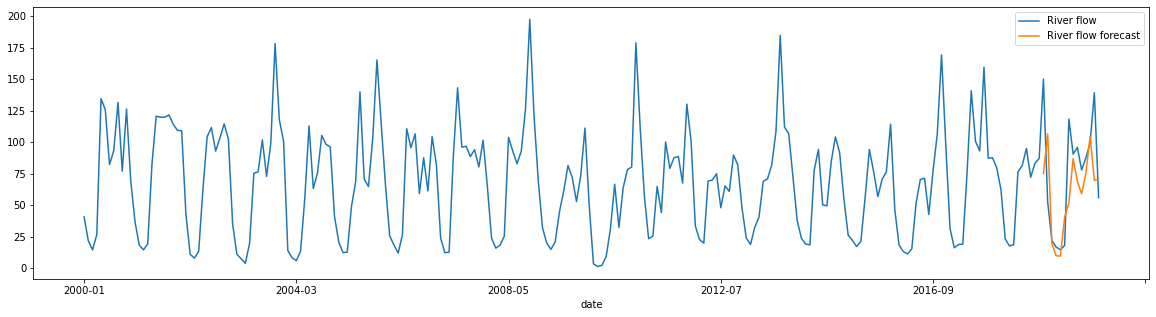


 ################ Basin 29 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00039: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0640 - rmse: 0.2529 - val_loss: 0.0163 - val_rmse: 0.1278
Epoch 2/100
16/16 - 0s - loss: 0.0376 - rmse: 0.1940 - val_loss: 0.0076 - val_rmse: 0.0871
Epoch 3/100
16/16 - 0s - loss: 0.0373 - rmse: 0.1930 - val_loss: 0.0058 - val_rmse: 0.0764
Epoch 4/100
16/16 - 0s - loss: 0.0369 - rmse: 0.1921 - val_loss: 0.0064 - val_rmse: 0.0799
Epoch 5/100
16/16 - 0s - loss: 0.0366 - rmse: 0.1912 - val_loss: 0.0057 - val_rmse: 0.0756
Epoch 6/100
16/16 - 0s - loss: 0.0362 - rmse: 0.1904 - val_loss: 0.0054 - val_rmse: 0.0734
Epoch 7/100
16/16 - 0s - loss: 0.0359 - rmse: 0.1895 - val_loss: 0.0053 - val_rmse: 0.0728
Epoch 8/100
16/16 - 0s - loss: 0.0356 - rmse: 0.1888 - val_loss: 0.0051 - val_rmse: 0.0717
Epoch 

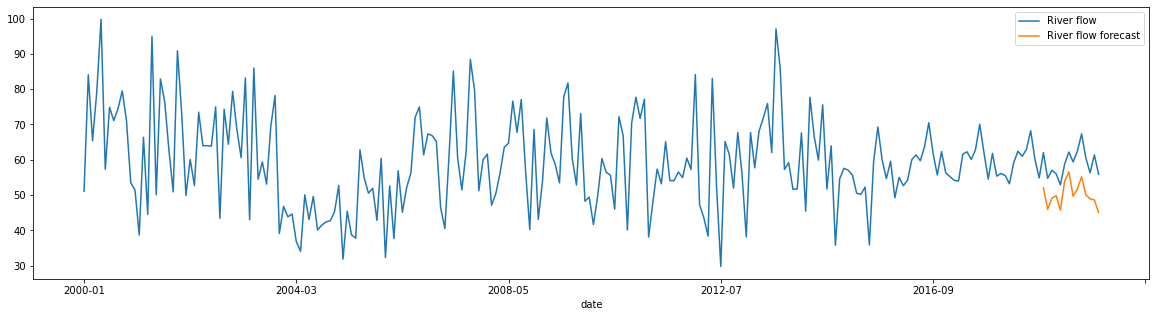


 ################ Basin 30 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00025: early stopping
Epoch 00074: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0321 - rmse: 0.1791 - val_loss: 0.0271 - val_rmse: 0.1647
Epoch 2/100
8/8 - 0s - loss: 0.0220 - rmse: 0.1482 - val_loss: 0.0158 - val_rmse: 0.1255
Epoch 3/100
8/8 - 0s - loss: 0.0186 - rmse: 0.1363 - val_loss: 0.0072 - val_rmse: 0.0850
Epoch 4/100
8/8 - 0s - loss: 0.0169 - rmse: 0.1301 - val_loss: 0.0057 - val_rmse: 0.0754
Epoch 5/100
8/8 - 0s - loss: 0.0148 - rmse: 0.1217 - val_loss: 0.0053 - val_rmse: 0.0727
Epoch 6/100
8/8 - 0s - loss: 0.0132 - rmse: 0.1149 - val_loss: 0.0044 - val_rmse: 0.0665
Epoch 7/100
8/8 - 0s - loss: 0.0121 - rmse: 0.1100 - val_loss: 0.0041 - val_rmse: 0.0640
Epoch 8/100
8/8 - 0s - loss: 0.0112 - rmse: 0.1060 - val_loss: 0.0040 - val_rmse: 0.0633
Epoch 9/100
8/8 - 0s -

Epoch 90/100
8/8 - 0s - loss: 0.0053 - rmse: 0.0726 - val_loss: 0.0028 - val_rmse: 0.0527
Epoch 91/100
8/8 - 0s - loss: 0.0052 - rmse: 0.0724 - val_loss: 0.0028 - val_rmse: 0.0529
Epoch 92/100
8/8 - 0s - loss: 0.0052 - rmse: 0.0723 - val_loss: 0.0028 - val_rmse: 0.0526
Epoch 93/100
8/8 - 0s - loss: 0.0052 - rmse: 0.0721 - val_loss: 0.0028 - val_rmse: 0.0527
Epoch 94/100
8/8 - 0s - loss: 0.0052 - rmse: 0.0720 - val_loss: 0.0028 - val_rmse: 0.0526
Epoch 95/100
8/8 - 0s - loss: 0.0052 - rmse: 0.0718 - val_loss: 0.0028 - val_rmse: 0.0526
Epoch 96/100
8/8 - 0s - loss: 0.0051 - rmse: 0.0717 - val_loss: 0.0028 - val_rmse: 0.0525
Epoch 97/100
8/8 - 0s - loss: 0.0051 - rmse: 0.0716 - val_loss: 0.0028 - val_rmse: 0.0525
Epoch 98/100
8/8 - 0s - loss: 0.0051 - rmse: 0.0714 - val_loss: 0.0027 - val_rmse: 0.0524
Epoch 99/100
8/8 - 0s - loss: 0.0051 - rmse: 0.0713 - val_loss: 0.0027 - val_rmse: 0.0524
Epoch 100/100
8/8 - 0s - loss: 0.0051 - rmse: 0.0712 - val_loss: 0.0027 - val_rmse: 0.0523
Test RMSE

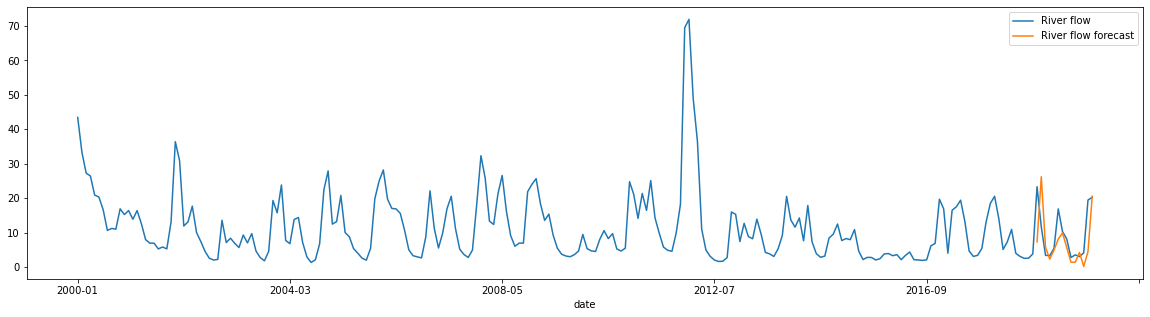


 ################ Basin 31 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00028: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00022: early stopping
Epoch 00068: early stopping
36 batch size
Epoch 1/100
6/6 - 2s - loss: 0.0924 - rmse: 0.3040 - val_loss: 0.0156 - val_rmse: 0.1247
Epoch 2/100
6/6 - 0s - loss: 0.0476 - rmse: 0.2181 - val_loss: 0.0573 - val_rmse: 0.2393
Epoch 3/100
6/6 - 0s - loss: 0.0411 - rmse: 0.2027 - val_loss: 0.0605 - val_rmse: 0.2460
Epoch 4/100
6/6 - 0s - loss: 0.0370 - rmse: 0.1925 - val_loss: 0.0379 - val_rmse: 0.1948
Epoch 5/100
6/6 - 0s - loss: 0.0350 - rmse: 0.1872 - val_loss: 0.0210 - val_rmse: 0.1450
Epoch 6/100
6/6 - 0s - loss: 0.0355 - rmse: 0.1885 - val_loss: 0.0149 - val_rmse: 0.1219
Epoch 7/100
6/6 - 0s - loss: 0.0347 - rmse: 0.1864 - val_loss: 0.0147 - val_rmse: 0.1213
Epoch 8/100
6/6 - 0s - loss: 0.0326 - rmse: 0.1806 - val_loss: 0.0165 - val_rmse: 0.1286
Epoch 9/100
6/6 - 0s - loss: 0.0309 - rmse: 0.1759

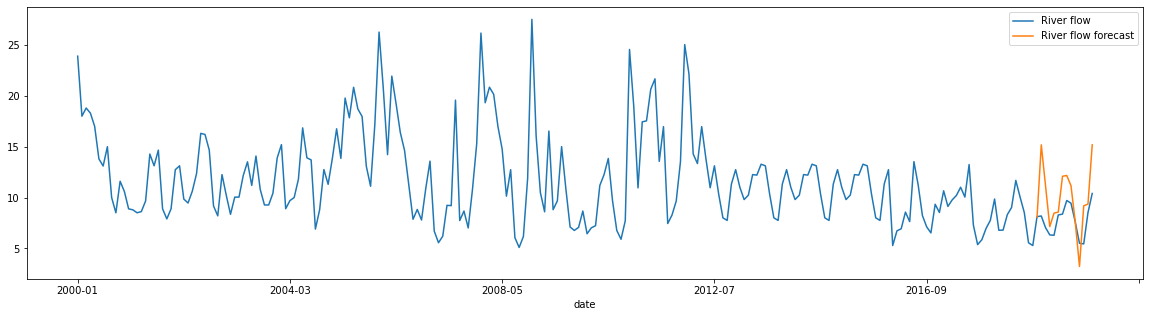


 ################ Basin 32 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00036: early stopping
Epoch 00030: early stopping
Epoch 00021: early stopping
Epoch 00041: early stopping
Epoch 00021: early stopping
Epoch 00070: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.1080 - rmse: 0.3287 - val_loss: 0.0200 - val_rmse: 0.1414
Epoch 2/100
8/8 - 0s - loss: 0.0454 - rmse: 0.2130 - val_loss: 0.0600 - val_rmse: 0.2449
Epoch 3/100
8/8 - 0s - loss: 0.0441 - rmse: 0.2099 - val_loss: 0.0448 - val_rmse: 0.2115
Epoch 4/100
8/8 - 0s - loss: 0.0354 - rmse: 0.1882 - val_loss: 0.0217 - val_rmse: 0.1474
Epoch 5/100
8/8 - 0s - loss: 0.0364 - rmse: 0.1908 - val_loss: 0.0189 - val_rmse: 0.1375
Epoch 6/100
8/8 - 0s - loss: 0.0355 - rmse: 0.1884 - val_loss: 0.0206 - val_rmse: 0.1435
Epoch 7/100
8/8 - 0s - loss: 0.0340 - rmse: 0.1845 - val_loss: 0.0223 - val_rmse: 0.1494
Epoch 8/100
8/8 - 0s - loss: 0.0331 - rmse: 0.1819 - val_loss: 0.0201 - val_rmse: 0.1416
Epoch 9/100
8/8 - 0s -

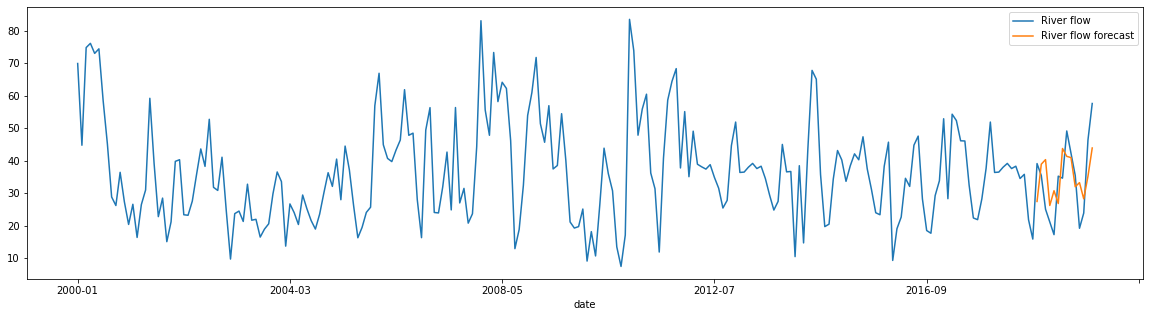


 ################ Basin 33 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00035: early stopping
Epoch 00037: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
36 batch size
Epoch 1/100
6/6 - 1s - loss: 0.0420 - rmse: 0.2049 - val_loss: 0.0282 - val_rmse: 0.1680
Epoch 2/100
6/6 - 0s - loss: 0.0397 - rmse: 0.1993 - val_loss: 0.0392 - val_rmse: 0.1980
Epoch 3/100
6/6 - 0s - loss: 0.0374 - rmse: 0.1934 - val_loss: 0.0290 - val_rmse: 0.1704
Epoch 4/100
6/6 - 0s - loss: 0.0303 - rmse: 0.1741 - val_loss: 0.0193 - val_rmse: 0.1390
Epoch 5/100
6/6 - 0s - loss: 0.0264 - rmse: 0.1625 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 6/100
6/6 - 0s - loss: 0.0243 - rmse: 0.1558 - val_loss: 0.0164 - val_rmse: 0.1281
Epoch 7/100
6/6 - 0s - loss: 0.0228 - rmse: 0.1511 - val_loss: 0.0174 - val_rmse: 0.1319
Epoch 8/100
6/6 - 0s - loss: 0.0215 - rmse: 0.1467 - val_loss: 0.0160 - val_rmse: 0.1264
Epoch 9/100
6/6 - 0s -

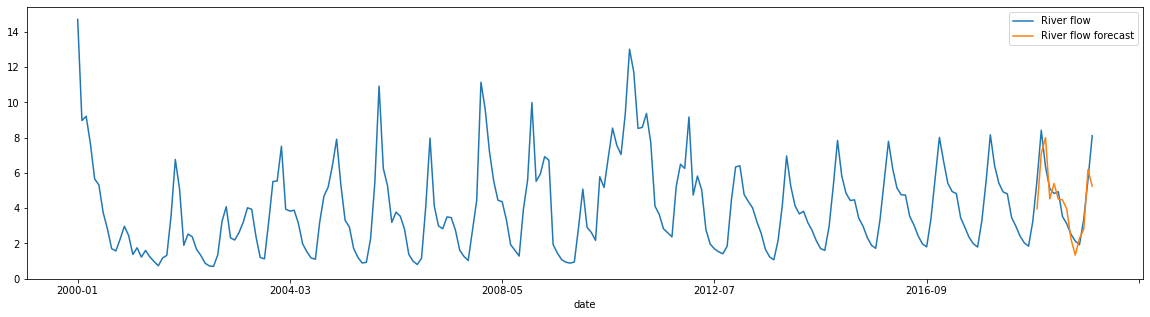


 ################ Basin 34 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00035: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0344 - rmse: 0.1853 - val_loss: 0.0250 - val_rmse: 0.1583
Epoch 2/100
16/16 - 0s - loss: 0.0207 - rmse: 0.1438 - val_loss: 0.0199 - val_rmse: 0.1412
Epoch 3/100
16/16 - 0s - loss: 0.0157 - rmse: 0.1254 - val_loss: 0.0137 - val_rmse: 0.1169
Epoch 4/100
16/16 - 0s - loss: 0.0130 - rmse: 0.1140 - val_loss: 0.0110 - val_rmse: 0.1048
Epoch 5/100
16/16 - 0s - loss: 0.0112 - rmse: 0.1056 - val_loss: 0.0093 - val_rmse: 0.0963
Epoch 6/100
16/16 - 0s - loss: 0.0102 - rmse: 0.1008 - val_loss: 0.0084 - val_rmse: 0.0915
Epoch 7/100
16/16 - 0s - loss: 0.0096 - rmse: 0.0979 - val_loss: 0.0079 - val_rmse: 0.0889
Epoch 8/100
16/16 - 0s - loss: 0.0092 - rmse: 0.0960 - val_loss: 0.0076 - val_rmse: 0.0870
Epoch 

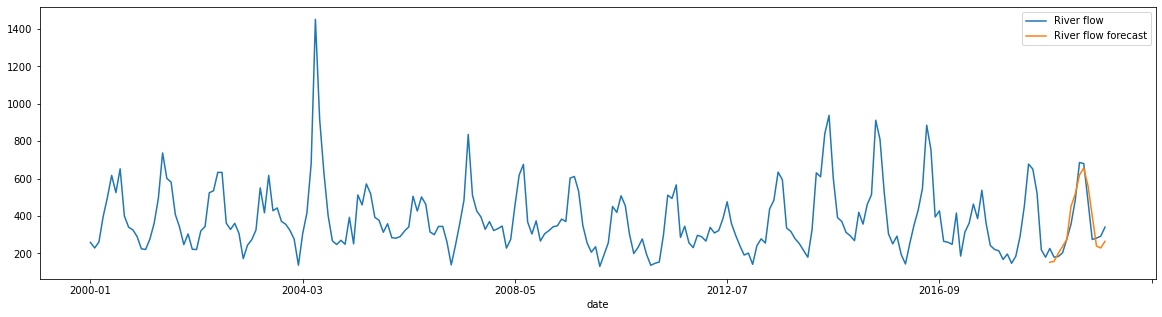


 ################ Basin 35 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00036: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.1682 - rmse: 0.4101 - val_loss: 0.0357 - val_rmse: 0.1891
Epoch 2/100
16/16 - 0s - loss: 0.0576 - rmse: 0.2401 - val_loss: 0.0690 - val_rmse: 0.2626
Epoch 3/100
16/16 - 0s - loss: 0.0387 - rmse: 0.1966 - val_loss: 0.0328 - val_rmse: 0.1810
Epoch 4/100
16/16 - 0s - loss: 0.0381 - rmse: 0.1951 - val_loss: 0.0279 - val_rmse: 0.1670
Epoch 5/100
16/16 - 0s - loss: 0.0342 - rmse: 0.1849 - val_loss: 0.0262 - val_rmse: 0.1619
Epoch 6/100
16/16 - 0s - loss: 0.0304 - rmse: 0.1742 - val_loss: 0.0262 - val_rmse: 0.1620
Epoch 7/100
16/16 - 0s - loss: 0.0283 - rmse: 0.1684 - val_loss: 0.0275 - val_rmse: 0.1658
Epoch 8/100
16/16 - 0s - loss: 0.0268 - rmse: 0.1636 - val_loss: 0.0284 - val_rmse: 0.1686
Epoch 

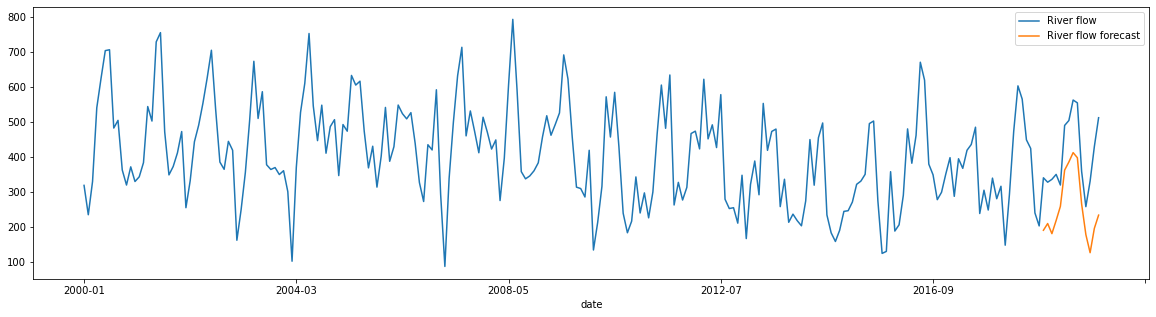


 ################ Basin 36 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00078: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0824 - rmse: 0.2870 - val_loss: 0.0716 - val_rmse: 0.2676
Epoch 2/100
16/16 - 0s - loss: 0.0443 - rmse: 0.2105 - val_loss: 0.0501 - val_rmse: 0.2238
Epoch 3/100
16/16 - 0s - loss: 0.0371 - rmse: 0.1926 - val_loss: 0.0426 - val_rmse: 0.2064
Epoch 4/100
16/16 - 0s - loss: 0.0290 - rmse: 0.1703 - val_loss: 0.0365 - val_rmse: 0.1912
Epoch 5/100
16/16 - 0s - loss: 0.0239 - rmse: 0.1547 - val_loss: 0.0322 - val_rmse: 0.1794
Epoch 6/100
16/16 - 0s - loss: 0.0204 - rmse: 0.1428 - val_loss: 0.0290 - val_rmse: 0.1704
Epoch 7/100
16/16 - 0s - loss: 0.0182 - rmse: 0.1350 - val_loss: 0.0269 - val_rmse: 0.1639
Epoch 8/100
16/16 - 0s - loss: 0.0168 - rmse: 0.1297 - val_loss: 0.0257 - val_rmse: 0.1603
Epoch 


 ################ Basin 37 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00031: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0440 - rmse: 0.2098 - val_loss: 0.0305 - val_rmse: 0.1747
Epoch 2/100
16/16 - 0s - loss: 0.0339 - rmse: 0.1841 - val_loss: 0.0189 - val_rmse: 0.1375
Epoch 3/100
16/16 - 0s - loss: 0.0267 - rmse: 0.1633 - val_loss: 0.0173 - val_rmse: 0.1316
Epoch 4/100
16/16 - 0s - loss: 0.0238 - rmse: 0.1543 - val_loss: 0.0133 - val_rmse: 0.1151
Epoch 5/100
16/16 - 0s - loss: 0.0214 - rmse: 0.1462 - val_loss: 0.0117 - val_rmse: 0.1082
Epoch 6/100
16/16 - 0s - loss: 0.0198 - rmse: 0.1408 - val_loss: 0.0105 - val_rmse: 0.1025
Epoch 7/100
16/16 - 0s - loss: 0.0186 - rmse: 0.1362 - val_loss: 0.0098 - val_rmse: 0.0988
Epoch 8/100
16/16 - 0s - loss: 0.0177 - rmse: 0.1331 - val_loss: 0.0093 - val_rmse: 0.0966
Epoch 

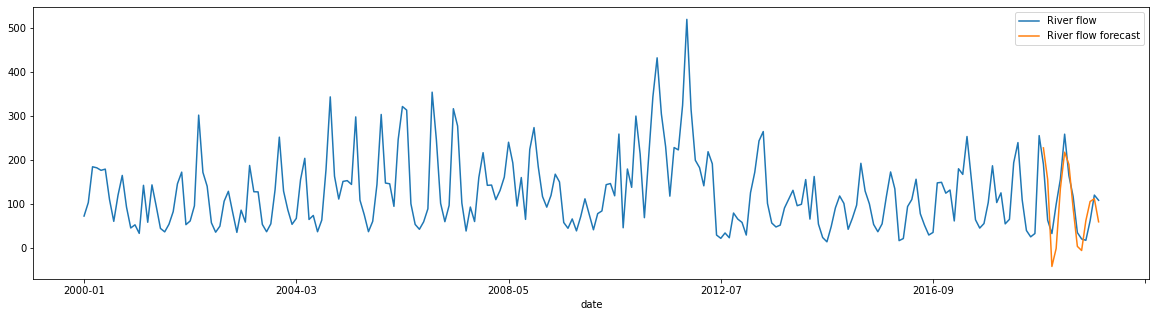


 ################ Basin 38 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00036: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00032: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0157 - rmse: 0.1253 - val_loss: 0.0092 - val_rmse: 0.0957
Epoch 2/100
16/16 - 0s - loss: 0.0145 - rmse: 0.1204 - val_loss: 0.0094 - val_rmse: 0.0970
Epoch 3/100
16/16 - 0s - loss: 0.0080 - rmse: 0.0893 - val_loss: 0.0075 - val_rmse: 0.0868
Epoch 4/100
16/16 - 0s - loss: 0.0079 - rmse: 0.0889 - val_loss: 0.0071 - val_rmse: 0.0840
Epoch 5/100
16/16 - 0s - loss: 0.0065 - rmse: 0.0806 - val_loss: 0.0063 - val_rmse: 0.0792
Epoch 6/100
16/16 - 0s - loss: 0.0063 - rmse: 0.0796 - val_loss: 0.0062 - val_rmse: 0.0786
Epoch 7/100
16/16 - 0s - loss: 0.0060 - rmse: 0.0775 - val_loss: 0.0057 - val_rmse: 0.0754
Epoch 8/100
16/16 - 0s - loss: 0.0057 - rmse: 0.0755 - val_loss: 0.0056 - val_rmse: 0.0746
Epoch 


 ################ Basin 39 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00021: early stopping
Epoch 00051: early stopping
Epoch 00022: early stopping
Epoch 00023: early stopping
Epoch 00022: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0931 - rmse: 0.3051 - val_loss: 0.0636 - val_rmse: 0.2522
Epoch 2/100
16/16 - 0s - loss: 0.0465 - rmse: 0.2155 - val_loss: 0.0487 - val_rmse: 0.2206
Epoch 3/100
16/16 - 0s - loss: 0.0366 - rmse: 0.1913 - val_loss: 0.0398 - val_rmse: 0.1994
Epoch 4/100
16/16 - 0s - loss: 0.0272 - rmse: 0.1649 - val_loss: 0.0306 - val_rmse: 0.1749
Epoch 5/100
16/16 - 0s - loss: 0.0208 - rmse: 0.1441 - val_loss: 0.0265 - val_rmse: 0.1627
Epoch 6/100
16/16 - 0s - loss: 0.0175 - rmse: 0.1321 - val_loss: 0.0242 - val_rmse: 0.1555
Epoch 7/100
16/16 - 0s - loss: 0.0157 - rmse: 0.1252 - val_loss: 0.0223 - val_rmse: 0.1492
Epoch 8/100
16/16 - 0s - loss: 0.0145 - rmse: 0.1206 - val_loss: 0.0217 - val_rmse: 0.1473
Epoch 9/100
16/16 - 0s - loss: 0.0

Epoch 88/100
16/16 - 0s - loss: 0.0093 - rmse: 0.0966 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 89/100
16/16 - 0s - loss: 0.0093 - rmse: 0.0964 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 90/100
16/16 - 0s - loss: 0.0093 - rmse: 0.0963 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 91/100
16/16 - 0s - loss: 0.0092 - rmse: 0.0961 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 92/100
16/16 - 0s - loss: 0.0092 - rmse: 0.0960 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 93/100
16/16 - 0s - loss: 0.0092 - rmse: 0.0958 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 94/100
16/16 - 0s - loss: 0.0092 - rmse: 0.0957 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 95/100
16/16 - 0s - loss: 0.0091 - rmse: 0.0955 - val_loss: 0.0165 - val_rmse: 0.1284
Epoch 00095: early stopping
Test RMSE: 192.534
Mean Absolute Percentage Error: 55.10580158963101
Symmetric Mean Absolute Percentage Error: 22.265155900920956



 ################ Basin 40 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00073: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0917 - rmse: 0.3029 - val_loss: 0.0689 - val_rmse: 0.2625
Epoch 2/100
16/16 - 0s - loss: 0.0498 - rmse: 0.2231 - val_loss: 0.0527 - val_rmse: 0.2297
Epoch 3/100
16/16 - 0s - loss: 0.0344 - rmse: 0.1856 - val_loss: 0.0331 - val_rmse: 0.1820
Epoch 4/100
16/16 - 0s - loss: 0.0242 - rmse: 0.1556 - val_loss: 0.0258 - val_rmse: 0.1607
Epoch 5/100
16/16 - 0s - loss: 0.0196 - rmse: 0.1401 - val_loss: 0.0220 - val_rmse: 0.1482
Epoch 6/100
16/16 - 0s - loss: 0.0172 - rmse: 0.1312 - val_loss: 0.0202 - val_rmse: 0.1422
Epoch 7/100
16/16 - 0s - loss: 0.0155 - rmse: 0.1245 - val_loss: 0.0190 - val_rmse: 0.1380
Epoch 8/100
16/16 - 0s - loss: 0.0142 - rmse: 0.1191 - val_loss: 0.0181 - val_rmse: 0.1347
Epoch 

Epoch 88/100
16/16 - 0s - loss: 0.0070 - rmse: 0.0838 - val_loss: 0.0130 - val_rmse: 0.1140
Epoch 89/100
16/16 - 0s - loss: 0.0070 - rmse: 0.0837 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 90/100
16/16 - 0s - loss: 0.0070 - rmse: 0.0836 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 91/100
16/16 - 0s - loss: 0.0070 - rmse: 0.0835 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 92/100
16/16 - 0s - loss: 0.0069 - rmse: 0.0833 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 93/100
16/16 - 0s - loss: 0.0069 - rmse: 0.0832 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 94/100
16/16 - 0s - loss: 0.0069 - rmse: 0.0831 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 95/100
16/16 - 0s - loss: 0.0069 - rmse: 0.0830 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 96/100
16/16 - 0s - loss: 0.0069 - rmse: 0.0829 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 97/100
16/16 - 0s - loss: 0.0069 - rmse: 0.0828 - val_loss: 0.0130 - val_rmse: 0.1139
Epoch 98/100
16/16 - 0s - loss: 0.0068 - rmse: 0.0827 - val_loss: 0.0130 - val_r


 ################ Basin 41 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00070: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.1655 - rmse: 0.4068 - val_loss: 0.0972 - val_rmse: 0.3118
Epoch 2/100
16/16 - 0s - loss: 0.0848 - rmse: 0.2913 - val_loss: 0.0647 - val_rmse: 0.2544
Epoch 3/100
16/16 - 0s - loss: 0.0562 - rmse: 0.2371 - val_loss: 0.0427 - val_rmse: 0.2066
Epoch 4/100
16/16 - 0s - loss: 0.0385 - rmse: 0.1962 - val_loss: 0.0263 - val_rmse: 0.1623
Epoch 5/100
16/16 - 0s - loss: 0.0259 - rmse: 0.1609 - val_loss: 0.0191 - val_rmse: 0.1383
Epoch 6/100
16/16 - 0s - loss: 0.0206 - rmse: 0.1434 - val_loss: 0.0165 - val_rmse: 0.1286
Epoch 7/100
16/16 - 0s - loss: 0.0179 - rmse: 0.1339 - val_loss: 0.0154 - val_rmse: 0.1239
Epoch 8/100
16/16 - 0s - loss: 0.0164 - rmse: 0.1279 - val_loss: 0.0142 - val_rmse: 0.1191
Epoch 

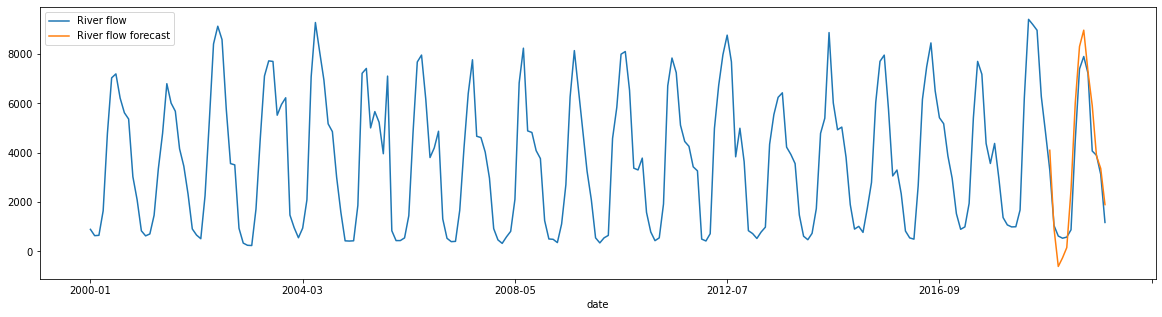


 ################ Basin 42 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00042: early stopping
Epoch 00022: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.1210 - rmse: 0.3479 - val_loss: 0.0978 - val_rmse: 0.3127
Epoch 2/100
16/16 - 0s - loss: 0.0575 - rmse: 0.2399 - val_loss: 0.0591 - val_rmse: 0.2430
Epoch 3/100
16/16 - 0s - loss: 0.0464 - rmse: 0.2153 - val_loss: 0.0413 - val_rmse: 0.2033
Epoch 4/100
16/16 - 0s - loss: 0.0354 - rmse: 0.1881 - val_loss: 0.0356 - val_rmse: 0.1888
Epoch 5/100
16/16 - 0s - loss: 0.0261 - rmse: 0.1617 - val_loss: 0.0262 - val_rmse: 0.1620
Epoch 6/100
16/16 - 0s - loss: 0.0207 - rmse: 0.1439 - val_loss: 0.0220 - val_rmse: 0.1484
Epoch 7/100
16/16 - 0s - loss: 0.0175 - rmse: 0.1323 - val_loss: 0.0194 - val_rmse: 0.1394
Epoch 8/100
16/16 - 0s - loss: 0.0160 - rmse: 0.1265 - val_loss: 0.0183 - val_rmse: 0.1352
Epoch 

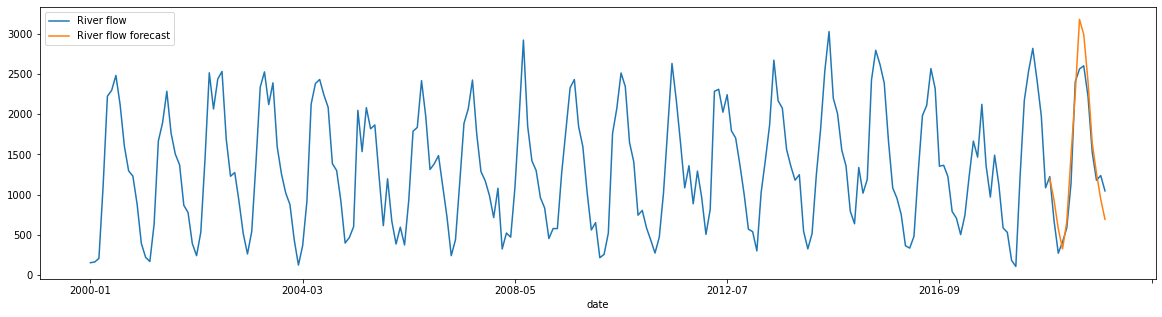


 ################ Basin 43 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00022: early stopping
Epoch 00038: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
Epoch 00021: early stopping
Epoch 00029: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.1259 - rmse: 0.3548 - val_loss: 0.0463 - val_rmse: 0.2151
Epoch 2/100
8/8 - 0s - loss: 0.0443 - rmse: 0.2105 - val_loss: 0.0515 - val_rmse: 0.2270
Epoch 3/100
8/8 - 0s - loss: 0.0378 - rmse: 0.1943 - val_loss: 0.0483 - val_rmse: 0.2198
Epoch 4/100
8/8 - 0s - loss: 0.0295 - rmse: 0.1719 - val_loss: 0.0377 - val_rmse: 0.1943
Epoch 5/100
8/8 - 0s - loss: 0.0283 - rmse: 0.1683 - val_loss: 0.0416 - val_rmse: 0.2040
Epoch 6/100
8/8 - 0s - loss: 0.0292 - rmse: 0.1709 - val_loss: 0.0427 - val_rmse: 0.2065
Epoch 7/100
8/8 - 0s - loss: 0.0278 - rmse: 0.1667 - val_loss: 0.0412 - val_rmse: 0.2031
Epoch 8/100
8/8 - 0s - loss: 0.0269 - rmse: 0.1639 - val_loss: 0.0419 - val_rmse: 0.2048
Epoch 9/100
8/8 - 0s -

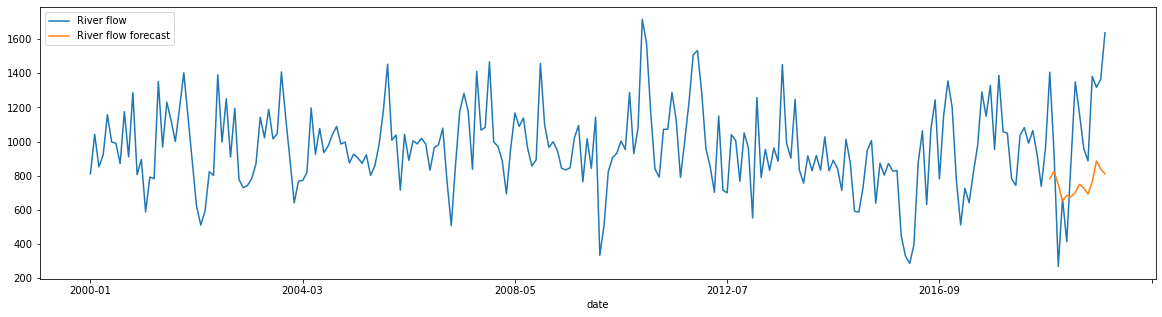


 ################ Basin 44 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00042: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
Epoch 00021: early stopping
Epoch 00029: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.1736 - rmse: 0.4166 - val_loss: 0.0572 - val_rmse: 0.2393
Epoch 2/100
8/8 - 0s - loss: 0.0574 - rmse: 0.2395 - val_loss: 0.0561 - val_rmse: 0.2368
Epoch 3/100
8/8 - 0s - loss: 0.0483 - rmse: 0.2199 - val_loss: 0.0660 - val_rmse: 0.2569
Epoch 4/100
8/8 - 0s - loss: 0.0400 - rmse: 0.2000 - val_loss: 0.0408 - val_rmse: 0.2019
Epoch 5/100
8/8 - 0s - loss: 0.0364 - rmse: 0.1907 - val_loss: 0.0371 - val_rmse: 0.1926
Epoch 6/100
8/8 - 0s - loss: 0.0378 - rmse: 0.1943 - val_loss: 0.0376 - val_rmse: 0.1939
Epoch 7/100
8/8 - 0s - loss: 0.0362 - rmse: 0.1903 - val_loss: 0.0364 - val_rmse: 0.1907
Epoch 8/100
8/8 - 0s - loss: 0.0348 - rmse: 0.1865 - val_loss: 0.0360 - val_rmse: 0.1896
Epoch 9/100
8/8 - 0s -

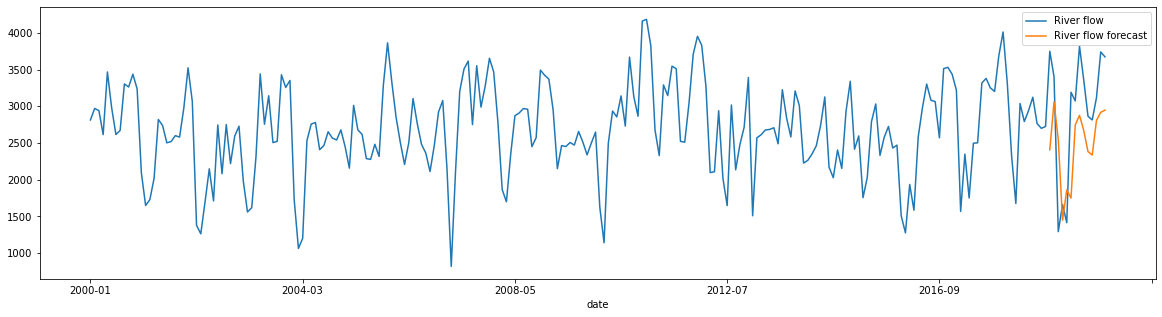


 ################ Basin 45 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00021: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
36 batch size
Epoch 1/100
6/6 - 1s - loss: 0.0500 - rmse: 0.2236 - val_loss: 0.0557 - val_rmse: 0.2361
Epoch 2/100
6/6 - 0s - loss: 0.0323 - rmse: 0.1797 - val_loss: 0.0472 - val_rmse: 0.2172
Epoch 3/100
6/6 - 0s - loss: 0.0268 - rmse: 0.1636 - val_loss: 0.0429 - val_rmse: 0.2071
Epoch 4/100
6/6 - 0s - loss: 0.0236 - rmse: 0.1538 - val_loss: 0.0412 - val_rmse: 0.2030
Epoch 5/100
6/6 - 0s - loss: 0.0211 - rmse: 0.1453 - val_loss: 0.0358 - val_rmse: 0.1893
Epoch 6/100
6/6 - 0s - loss: 0.0179 - rmse: 0.1339 - val_loss: 0.0297 - val_rmse: 0.1725
Epoch 7/100
6/6 - 0s - loss: 0.0159 - rmse: 0.1259 - val_loss: 0.0265 - val_rmse: 0.1628
Epoch 8/100
6/6 - 0s - loss: 0.0147 - rmse: 0.1213 - val_loss: 0.0251 - val_rmse: 0.1583
Epoch 9/100
6/6 - 0s - loss: 0.0140 - rmse: 0.1185

Epoch 90/100
6/6 - 0s - loss: 0.0077 - rmse: 0.0875 - val_loss: 0.0142 - val_rmse: 0.1190
Epoch 91/100
6/6 - 0s - loss: 0.0076 - rmse: 0.0874 - val_loss: 0.0141 - val_rmse: 0.1188
Epoch 92/100
6/6 - 0s - loss: 0.0076 - rmse: 0.0873 - val_loss: 0.0141 - val_rmse: 0.1187
Epoch 93/100
6/6 - 0s - loss: 0.0076 - rmse: 0.0872 - val_loss: 0.0141 - val_rmse: 0.1186
Epoch 94/100
6/6 - 0s - loss: 0.0076 - rmse: 0.0871 - val_loss: 0.0140 - val_rmse: 0.1185
Epoch 95/100
6/6 - 0s - loss: 0.0076 - rmse: 0.0870 - val_loss: 0.0140 - val_rmse: 0.1184
Epoch 96/100
6/6 - 0s - loss: 0.0076 - rmse: 0.0869 - val_loss: 0.0140 - val_rmse: 0.1183
Epoch 97/100
6/6 - 0s - loss: 0.0075 - rmse: 0.0869 - val_loss: 0.0140 - val_rmse: 0.1181
Epoch 98/100
6/6 - 0s - loss: 0.0075 - rmse: 0.0868 - val_loss: 0.0139 - val_rmse: 0.1180
Epoch 99/100
6/6 - 0s - loss: 0.0075 - rmse: 0.0867 - val_loss: 0.0139 - val_rmse: 0.1179
Epoch 100/100
6/6 - 0s - loss: 0.0075 - rmse: 0.0866 - val_loss: 0.0139 - val_rmse: 0.1178
Test RMSE

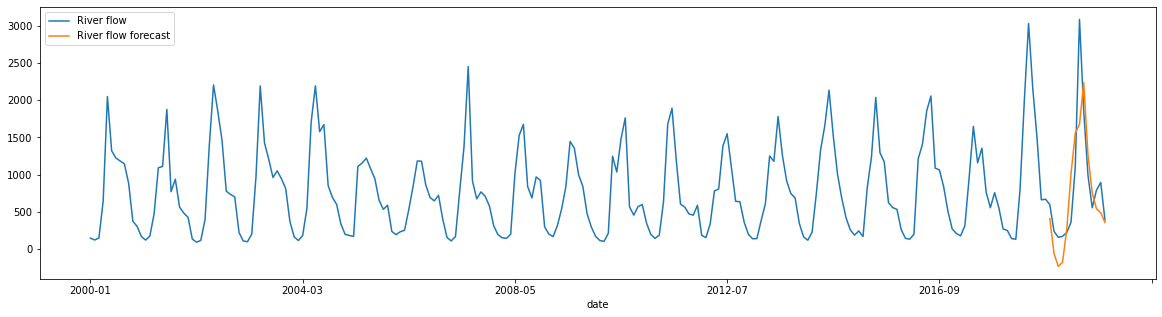


 ################ Basin 46 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00026: early stopping
Epoch 00024: early stopping
Epoch 00023: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.0744 - rmse: 0.2728 - val_loss: 0.0671 - val_rmse: 0.2590
Epoch 2/100
16/16 - 0s - loss: 0.0370 - rmse: 0.1922 - val_loss: 0.0507 - val_rmse: 0.2252
Epoch 3/100
16/16 - 0s - loss: 0.0281 - rmse: 0.1678 - val_loss: 0.0379 - val_rmse: 0.1946
Epoch 4/100
16/16 - 0s - loss: 0.0202 - rmse: 0.1422 - val_loss: 0.0318 - val_rmse: 0.1783
Epoch 5/100
16/16 - 0s - loss: 0.0164 - rmse: 0.1282 - val_loss: 0.0277 - val_rmse: 0.1663
Epoch 6/100
16/16 - 0s - loss: 0.0147 - rmse: 0.1210 - val_loss: 0.0266 - val_rmse: 0.1630
Epoch 7/100
16/16 - 0s - loss: 0.0135 - rmse: 0.1163 - val_loss: 0.0248 - val_rmse: 0.1574
Epoch 8/100
16/16 - 0s - loss: 0.0128 - rmse: 0.1133 - val_loss: 0.0241 - val_rmse: 0.1552
Epoch 9/100
16/16 - 0s - loss: 0.0

Epoch 88/100
16/16 - 0s - loss: 0.0084 - rmse: 0.0916 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 89/100
16/16 - 0s - loss: 0.0084 - rmse: 0.0915 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 90/100
16/16 - 0s - loss: 0.0084 - rmse: 0.0914 - val_loss: 0.0159 - val_rmse: 0.1263
Epoch 91/100
16/16 - 0s - loss: 0.0083 - rmse: 0.0913 - val_loss: 0.0159 - val_rmse: 0.1263
Epoch 92/100
16/16 - 0s - loss: 0.0083 - rmse: 0.0912 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 93/100
16/16 - 0s - loss: 0.0083 - rmse: 0.0911 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 94/100
16/16 - 0s - loss: 0.0083 - rmse: 0.0910 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 95/100
16/16 - 0s - loss: 0.0083 - rmse: 0.0909 - val_loss: 0.0160 - val_rmse: 0.1263
Epoch 00095: early stopping
Test RMSE: 960.123
Mean Absolute Percentage Error: 73.57316915051369
Symmetric Mean Absolute Percentage Error: 28.16108291767017



 ################ Basin 47 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00066: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
36 batch size
Epoch 1/100
6/6 - 1s - loss: 0.1189 - rmse: 0.3449 - val_loss: 0.1048 - val_rmse: 0.3238
Epoch 2/100
6/6 - 0s - loss: 0.0684 - rmse: 0.2616 - val_loss: 0.0752 - val_rmse: 0.2742
Epoch 3/100
6/6 - 0s - loss: 0.0537 - rmse: 0.2318 - val_loss: 0.0674 - val_rmse: 0.2596
Epoch 4/100
6/6 - 0s - loss: 0.0455 - rmse: 0.2134 - val_loss: 0.0568 - val_rmse: 0.2383
Epoch 5/100
6/6 - 0s - loss: 0.0387 - rmse: 0.1967 - val_loss: 0.0486 - val_rmse: 0.2205
Epoch 6/100
6/6 - 0s - loss: 0.0339 - rmse: 0.1842 - val_loss: 0.0427 - val_rmse: 0.2068
Epoch 7/100
6/6 - 0s - loss: 0.0294 - rmse: 0.1714 - val_loss: 0.0359 - val_rmse: 0.1894
Epoch 8/100
6/6 - 0s - loss: 0.0243 - rmse: 0.1558 - val_loss: 0.0290 - val_rmse: 0.1704
Epoch 9/100
6/6 - 0s -

Epoch 90/100
6/6 - 0s - loss: 0.0047 - rmse: 0.0688 - val_loss: 0.0057 - val_rmse: 0.0758
Epoch 91/100
6/6 - 0s - loss: 0.0047 - rmse: 0.0687 - val_loss: 0.0057 - val_rmse: 0.0756
Epoch 92/100
6/6 - 0s - loss: 0.0047 - rmse: 0.0685 - val_loss: 0.0057 - val_rmse: 0.0755
Epoch 93/100
6/6 - 0s - loss: 0.0047 - rmse: 0.0684 - val_loss: 0.0057 - val_rmse: 0.0754
Epoch 94/100
6/6 - 0s - loss: 0.0047 - rmse: 0.0683 - val_loss: 0.0057 - val_rmse: 0.0753
Epoch 95/100
6/6 - 0s - loss: 0.0047 - rmse: 0.0682 - val_loss: 0.0056 - val_rmse: 0.0751
Epoch 96/100
6/6 - 0s - loss: 0.0046 - rmse: 0.0681 - val_loss: 0.0056 - val_rmse: 0.0750
Epoch 97/100
6/6 - 0s - loss: 0.0046 - rmse: 0.0680 - val_loss: 0.0056 - val_rmse: 0.0749
Epoch 98/100
6/6 - 0s - loss: 0.0046 - rmse: 0.0679 - val_loss: 0.0056 - val_rmse: 0.0748
Epoch 99/100
6/6 - 0s - loss: 0.0046 - rmse: 0.0678 - val_loss: 0.0056 - val_rmse: 0.0747
Epoch 100/100
6/6 - 0s - loss: 0.0046 - rmse: 0.0677 - val_loss: 0.0056 - val_rmse: 0.0746
Test RMSE

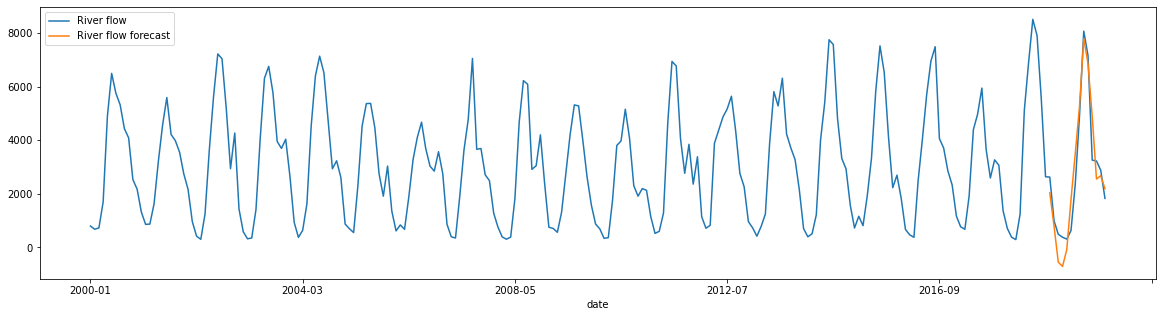


 ################ Basin 48 ############### 

(215, 1, 33) (215,) (14, 1, 33) (14,)
Epoch 00075: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
16/16 - 1s - loss: 0.1260 - rmse: 0.3550 - val_loss: 0.0989 - val_rmse: 0.3145
Epoch 2/100
16/16 - 0s - loss: 0.0582 - rmse: 0.2412 - val_loss: 0.0548 - val_rmse: 0.2340
Epoch 3/100
16/16 - 0s - loss: 0.0314 - rmse: 0.1773 - val_loss: 0.0228 - val_rmse: 0.1510
Epoch 4/100
16/16 - 0s - loss: 0.0162 - rmse: 0.1275 - val_loss: 0.0131 - val_rmse: 0.1145
Epoch 5/100
16/16 - 0s - loss: 0.0114 - rmse: 0.1069 - val_loss: 0.0106 - val_rmse: 0.1031
Epoch 6/100
16/16 - 0s - loss: 0.0108 - rmse: 0.1038 - val_loss: 0.0115 - val_rmse: 0.1072
Epoch 7/100
16/16 - 0s - loss: 0.0098 - rmse: 0.0992 - val_loss: 0.0099 - val_rmse: 0.0996
Epoch 8/100
16/16 - 0s - loss: 0.0093 - rmse: 0.0962 - val_loss: 0.0095 - val_rmse: 0.0977
Epoch 

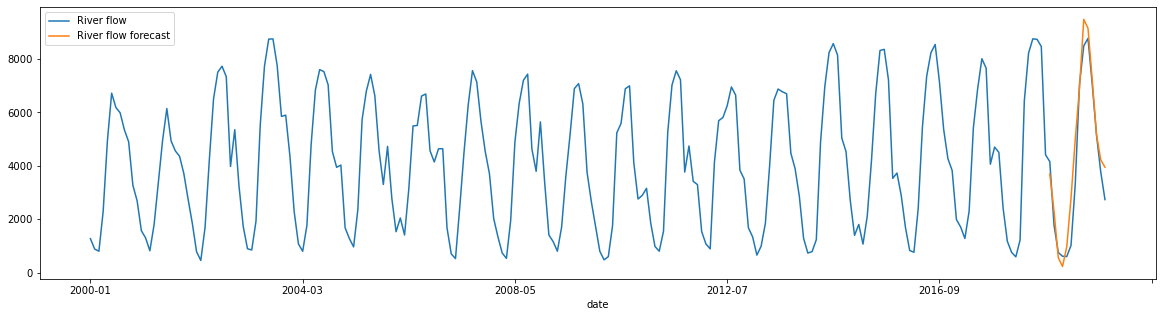

In [3]:
RMSE = []
MAPE = []
sMAPE = []
epochs = []
batch_sizes = []
list_df_plot = []

for i in mcs:
    print("\n ################ Basin " + str(i) + " ############### \n")
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                         'v_rainfall_total']].copy().reset_index(drop = True)
    nobs = 12 #predict 1 year
    df_train, df_test = temp_df[0:-nobs], temp_df[-nobs:]

    #Scale variables between 0 and 1 (using min and max from validation data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(df_train)
    test_scaled = scaler.transform(df_test)
    scaled = np.concatenate([train_scaled, test_scaled], axis=0)

    reframed = series_to_supervised(scaled, 11)
    reframed.drop(reframed.columns[[reframed.shape[1]-2, reframed.shape[1]-1]], axis=1, inplace=True)
    reframed

    #Transform to format required for LSTM 
    values = reframed.values
    n_train_months = reframed.shape[1]-(12*4)
    train = values[:n_train_months, :]
    test = values[n_train_months:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    #Define LSTM model
    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError(name='rmse')])
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20,  verbose=1, mode='min')
    callbacks_list = [earlystop]
    # hyperparameter tunning
    batch_size = [12, 24, 36, 48, 60, 72]
    res = [model.fit(train_X, train_y, epochs=100, batch_size=batch, verbose=0, shuffle=False, validation_split=0.15, callbacks=callbacks_list).history['val_rmse'][-1] for batch in batch_size]
    best_batch = batch_size[np.argmin(res)]
    print(str(best_batch)+ " batch size")
    batch_sizes.append(best_batch)
    # fit network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError(name='rmse')])
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20,  verbose=1, mode='min')
    callbacks_list = [earlystop]
    history = model.fit(train_X, train_y, epochs=100, batch_size=best_batch, verbose=2, shuffle=False, validation_split=0.15, callbacks=callbacks_list)# validation_data=(test_X, test_y), 
    epochs.append(history.epoch[-1])
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()

    #Evaluate model
    # make a prediction
    yhat = model.predict(test_X)
    test_X2 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X2[:, 1:3]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X2[:, 1:3]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)
    print('Mean Absolute Percentage Error:', np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100)
    print('Symmetric Mean Absolute Percentage Error:', np.mean(np.abs((inv_y - inv_yhat) / (abs(inv_y)+abs(inv_yhat)))) * 100)

    RMSE.append(rmse)
    MAPE.append(np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100)
    sMAPE.append(np.mean(np.abs((inv_y - inv_yhat) / (abs(inv_y)+abs(inv_yhat)))) * 100)

    #Plot original series + predictions
    inv_yhat_s = pd.Series(inv_yhat)
    inv_yhat_s.index = range((temp_df.shape[0]-14), temp_df.shape[0])
    dict1 = {'River flow' : temp_df['v_flow_mean'], 'River flow forecast' : inv_yhat_s}
    df_plot = pd.DataFrame(dict1)
    df_plot.index = macrodata[data['mc'] == i]['date'].reset_index().date
    df_plot.plot(figsize=(20,5))
    pyplot.show()
    
    #Export observed and predicted for plotting
    list_df_plot.append(df_plot)

In [5]:
#pd.DataFrame(RMSE, means, sd)
dict = {'basin': mcs, 'RMSE': RMSE,  'MAPE': MAPE, 'sMAPE': sMAPE, 'epochs': epochs, 'batch_size': batch_sizes}  
    
df = pd.DataFrame(dict) 
df

basin        RMSE        MAPE      sMAPE  epochs  batch_size
0       1    0.618007   15.274762   6.709903      25          12
1       2   14.609787   53.035572  31.273453      30          12
2       3   45.489517   23.149031  12.824969      41          12
3       4    1.278487   24.226967  10.768503      44          12
4       5   16.804869   25.758021  14.887917      61          24
5       6   15.336067   33.966310  16.582517      99          12
6       7   65.192216   27.055397  12.471429      35          12
7       8   15.269510   33.282016  20.090849      35          12
8       9    3.727422   83.811106  24.255971      36          12
9      10    7.256415   37.994978  24.657855      27          12
10     11    6.170385   41.564720  17.260800      38          12
11     12   13.827987  118.616271  34.094763      99          12
12     13  104.344266   30.218544  19.682038      28          12
13     14   25.405459   28.486915  13.353951      30          12
14     15   31.920486   55.703348  26.416626      28          12
15     16   79.073661   19.389622  10.073244      30          12
16     17    2.327308   15.625126   8.688295      48          24
17     18   12.939637   17.672014   8.512457      38          60
18     19    3.693328   81.290441  36.226849      99          36
19     20   29.458124   36.191516  17.226304      50          12
20     21    2.589901   20.985471  12.155130      32          12
21     22   92.556813  105.876889  43.638787      58          24
22     23   37.907966   66.529792  25.312549      41          12
23     24    9.076002   54.265162  37.518714      22          12
24     25    4.268228   48.323270  34.492621      25          12
25     26  114.386740  333.429366  56.128822      95          36
26     27    9.182615  101.348553  50.498406      24          12
27     28   37.682743   40.810683  20.315726      59          24
28     29    9.207499   15.014680   8.156994      31          12
29     30    7.592949   50.847360  31.615260      99          24
30     31    3.130752   32.152904  13.460618      36          36
31     32    9.802059   30.031112  13.356520      49          24
32     33    1.172795   20.405930  10.691682      63          36
33     34   63.308871   17.117814   8.543755      33          12
34     35  157.846120   36.790146  23.345616      34          12
35     36   59.433345   70.053190  28.328564      57          12
36     37   51.537391   84.125733  41.919343      29          12
37     38   14.261801   17.971741  10.076471      32          12
38     39  192.534016   55.105802  22.265156      94          12
39     40  403.465343   75.711788  35.371208      99          12
40     41  995.667310   58.497170  28.340225      68          12
41     42  282.614753   24.599284  10.736146      41          12
42     43  458.726201   44.286404  21.808437      23          24
43     44  803.191174   26.687658  13.393234      62          24
44     45  501.548830   76.808681  36.626874      99          36
45     46  960.122837   73.573169  28.161083      94          12
46     47  801.829523   72.354601  31.623640      99          36
47     48  828.296234   35.009557  14.439479      62          12

In [6]:
df.to_csv(r'LSTM_results.csv', index=False)

In [7]:
list_out = []
for i in range(len(mcs)):
    tmp = list_df_plot[i].copy()
    tmp['Basin'] = mcs[i]
    list_out.append(tmp)

df_out = pd.concat(list_out, axis=0)
df_out.to_csv(r'LSTM_predictions.csv')